


# Projet 02 : Analysez des données de systèmes éducatifs
L'entreprise Academy propose des contenus de formation en ligne pour un public de niveau lycée et université. L'objectif de la mission est de réaliser une première analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

## Problématiques :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

 ### 1- Découverte des DataSet 
L'objectif est de prendre connaissance des différents DataSet qui nous ont été mis à disposition, puis de créer un DataFrame  que nous personnaliserons en fonction de nos besoins


#### Importation des librairies

In [1]:
import numpy as np  # linear algebra
import pandas as pd   # data processing, CSV file
import matplotlib.pyplot as plt #display graph
import seaborn as sns #display graph
import pygal #cartographie les pays 
%matplotlib inline


### Chargement des dataset
Les données sont extraites de la Banque mondiale et sont disponible aux adresses suivantes et qui contient 5 jeux de données :

https://datacatalog.worldbank.org/dataset/education-statistics




In [2]:
data =pd.read_csv('EdStatsData.csv')
country=pd.read_csv('EdStatsCountry.csv')
series=pd.read_csv('EdStatsSeries.csv')
country_series=pd.read_csv('EdStatsCountry-Series.csv')
foot_note=pd.read_csv('EdStatsFootNote.csv')

#### Analyse Exploratoire des données
Information contenues dans le jeu de données

In [3]:
# determiner la taille de chaque dataFrame 

print ('_.'*40,'\n')
print(f'Le fichier data comporte {data.shape[0]} lignes et {data.shape[1]} colonnes')
print(f'Le fichier country comporte {country.shape[0]} lignes et {country.shape[1]} colonnes')
print(f'Le fichier series comporte {series.shape[0]} lignes et {series.shape[1]} colonnes')
print(f'Le fichier country_series comporte {country_series.shape[0]} lignes et {country_series.shape[1]} colonnes') 
print(f'Le fichier foot_note comporte {foot_note.shape[0]} lignes et {foot_note.shape[1]} colonnes')
print ('\n','_.'*40) 


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._. 

Le fichier data comporte 886930 lignes et 70 colonnes
Le fichier country comporte 241 lignes et 32 colonnes
Le fichier series comporte 3665 lignes et 21 colonnes
Le fichier country_series comporte 613 lignes et 4 colonnes
Le fichier foot_note comporte 643638 lignes et 5 colonnes

 _._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.


#### Les types des variables 
- pour le dataFrame data 

In [4]:
data.dtypes
data.dtypes.value_counts()

float64    66
object      4
dtype: int64

- pour le dataFrame country

In [5]:
country.dtypes.value_counts()

object     28
float64     4
dtype: int64

- pour le dataFrame series

In [6]:
series.dtypes.value_counts()

object     15
float64     6
dtype: int64

- pour le dataFrame country_series

In [7]:
country_series.dtypes.value_counts()

object     3
float64    1
dtype: int64

- pour le dataFrame foot_note

In [8]:
foot_note.dtypes.value_counts()

object     4
float64    1
dtype: int64

 #### Analyse des valeurs manquantes 
 

In [9]:
data.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886926,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886927,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886928,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [11]:
data.isnull().sum().sum()

53455179

In [12]:
# définir une fonction pour calculer le pourcentage des valeurs manquantes
def null_prop (df): 
     return df.isnull().sum().sum() * 100 / (df.shape[0] * df.shape[1])

In [13]:
print ('_.'*40,'\n')

print(f'le pourcentage des valeures manquantes dans le DF data est : {null_prop(data):.3} %')
print(f'le pourcentage des valeures manquantes dans le DF country est : {null_prop(country):.3} %')
print(f'le pourcentage des valeures manquantes dans le DF series est : {null_prop(series):.3} %')
print(f'le pourcentage des valeures manquantes dans le DF country_series est : {null_prop(country_series):.3} %')
print(f'le pourcentage des valeures manquantes dans le DF foot_note est : {null_prop(foot_note):.3} %')

print ('\n','_.'*40) 


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._. 

le pourcentage des valeures manquantes dans le DF data est : 86.1 %
le pourcentage des valeures manquantes dans le DF country est : 30.5 %
le pourcentage des valeures manquantes dans le DF series est : 71.7 %
le pourcentage des valeures manquantes dans le DF country_series est : 25.0 %
le pourcentage des valeures manquantes dans le DF foot_note est : 20.0 %

 _._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.


  ####   Les données dupliquées 

In [14]:
print ('_.'*40,'\n')

print(f'les donées dupliquées dans le DF data est égale à : {data.duplicated().any().sum()}')
print(f'les donées dupliquées dans le DF country est égale à : {country.duplicated().any().sum()}')
print(f'les donées dupliquées dans le DF series est égale à : {series.duplicated().any().sum()}')
print(f'les donées dupliquées dans le DF country_series est égale à : {country_series.duplicated().any().sum()}')
print(f'les donées dupliquées dans le DF foot_note est égale à : {foot_note.duplicated().any().sum()}')

print ('\n','_.'*40) 


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._. 

les donées dupliquées dans le DF data est égale à : 0
les donées dupliquées dans le DF country est égale à : 0
les donées dupliquées dans le DF series est égale à : 0
les donées dupliquées dans le DF country_series est égale à : 0
les donées dupliquées dans le DF foot_note est égale à : 0

 _._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.


## Bilan sur les jeux de données 

### Informations génerales sur les DF

### EdStatsData

In [15]:
print ('informations génerales sur le DF data\n' )
data.head()

informations génerales sur le DF data



,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Les observations 

- Les deux premières colonnes indiquent les informations sur les pays (nom et code).
- Les deux colonnes suivantes contiennent des informations sur les indicateurs (nom et code).
- les colonnes suivantes donnent les valeurs de l'indicateur depuis 1970 à 2100.
- De nombreuses valeurs ne sont pas renseignées (NaN).



In [16]:
#  Les régions et les revenus sont situées au début de la colonne "Country Name" par ordre alphabétique, 
# de 'Arab World' à 'World').Ensuite viennent les pays, également classés par ordre alphabétique (de 'Afghanistan'
# à 'Zimbabwe')

liste_pays = list(data["Country Name"].unique())
regions_income =[] 
while 'World' in liste_pays:
    regions_income.append(liste_pays .pop(0))
    
print("Liste des {} régions : de {} à {}".format(len(regions_income ),regions_income [0], regions_income [-1]))
print("Liste des {} pays : de {} à {}".format(len(liste_pays ), liste_pays[0], liste_pays [-1]))

Liste des 25 régions : de Arab World à World
Liste des 217 pays : de Afghanistan à Zimbabwe


In [17]:

#Résumé statistique
data.loc[:,"2000":"2015"].describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05
mean,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10
std,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11
min,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,5.699035e+00,1.599897e+01,1.584246e+01,1.550983e+01,1.418687e+01,5.720000e+00,1.277624e+01,1.268661e+01,1.233467e+01,1.181939e+01,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01
50%,5.078717e+01,8.300000e+02,9.460000e+02,3.956150e+02,3.350000e+02,5.031512e+01,9.981849e+01,1.000000e+02,1.000000e+02,9.925039e+01,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01
75%,3.343950e+04,1.746540e+05,1.770990e+05,1.474790e+05,1.584082e+05,2.993150e+04,1.187198e+05,1.343790e+05,1.453855e+05,1.180412e+05,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04
max,6.327293e+13,6.477834e+13,6.654753e+13,6.906328e+13,7.278829e+13,7.624045e+13,8.031840e+13,8.469145e+13,8.711022e+13,8.677516e+13,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14


In [18]:
print('taux de remplissage par colonne')
print('_'*60)

tx_remplissage=100*(len(data)-data.isnull().sum())/len(data)
print(tx_remplissage)

taux de remplissage par colonne
____________________________________________________________
Country Name      100.000000
Country Code      100.000000
Indicator Name    100.000000
Indicator Code    100.000000
1970                8.150361
                     ...    
2085                5.799330
2090                5.799330
2095                5.799330
2100                5.799330
Unnamed: 69         0.000000
Length: 70, dtype: float64



- Nous devons séparer les deux listes 

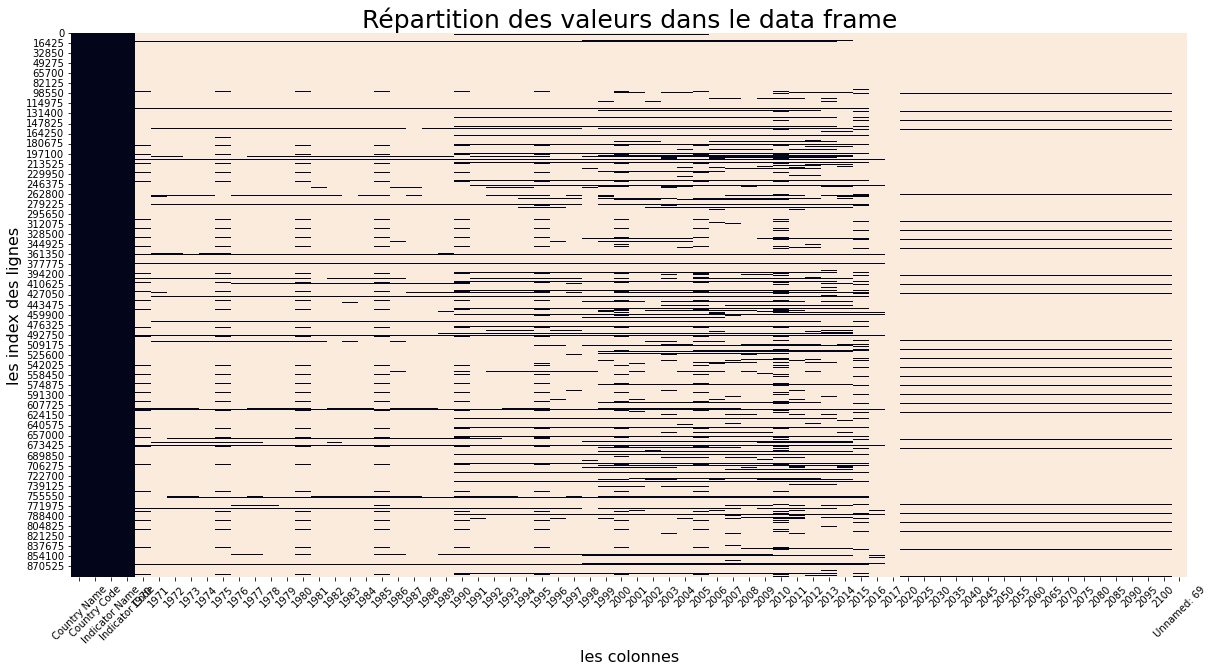

<Figure size 432x288 with 0 Axes>

In [19]:
# les valeurs manquantes dans le DF 'data'
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.title('Répartition des valeurs dans le data frame',size=25)
plt.xlabel("les colonnes", size=16)
plt.xticks(rotation=45)
plt.ylabel("les index des lignes",size=16)
plt.show()
plt.savefig('Répartition des valeurs dans le data frame')

C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


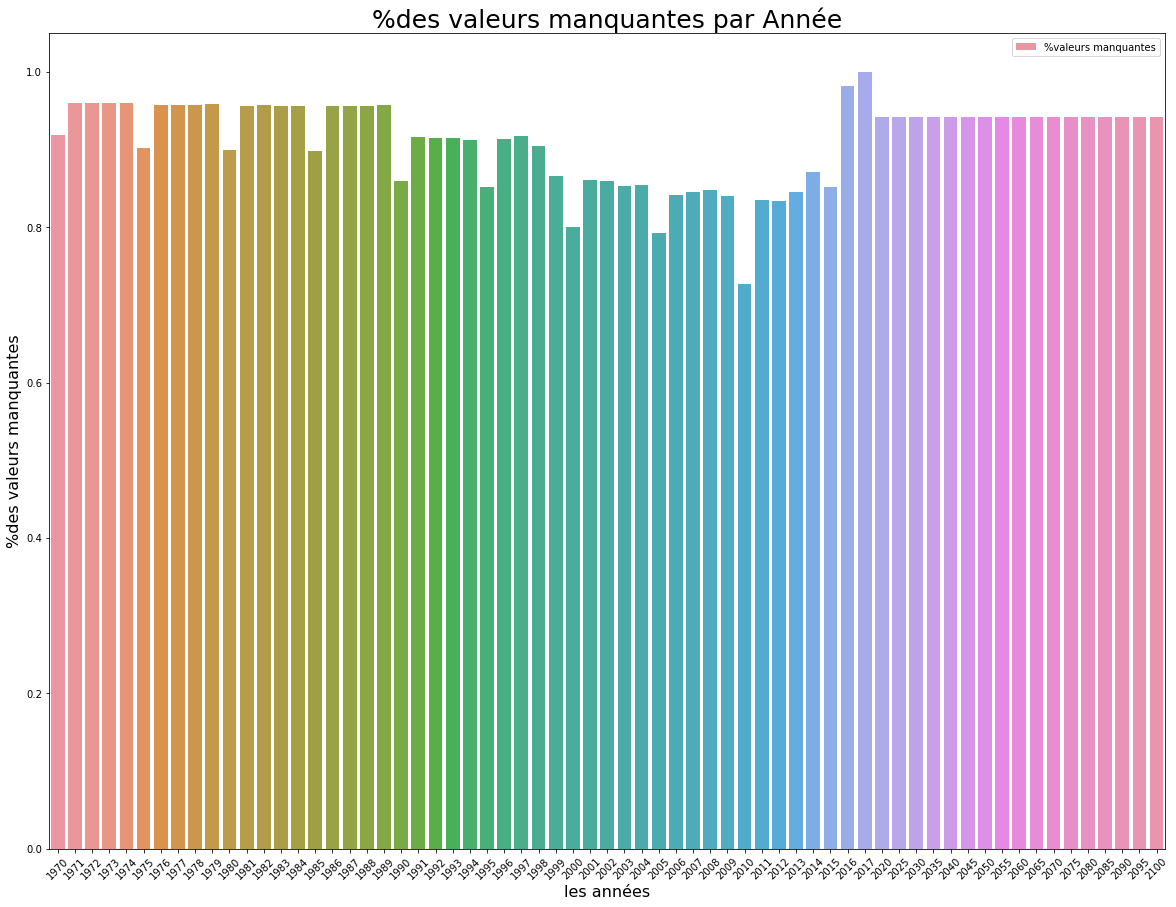

In [20]:
# Représentation de % des valeurs manquantes 

data_years=data.drop(data.columns[[0,1,2,3,-1]], axis='columns')

taux_Nan = [] 
for i in range(len(data_years.columns)): 
    taux_Nan.append(data_years[data_years.columns[i]].isnull().sum()/len(data_years*100))
taux_Nan #renvoi un pourcentage
plt.figure(figsize=(20,15))
x=data_years.columns #le vecteur pour l'axe x
sns.barplot(x,taux_Nan,label='%valeurs manquantes')
plt.title('%des valeurs manquantes par Année',size=25)
plt.legend(loc='upper right')
plt.xlabel("les années", size=16)
plt.xticks(rotation=45)
plt.ylabel("%des valeurs manquantes",size=16)
plt.show()


### EdStatsCountry

In [21]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


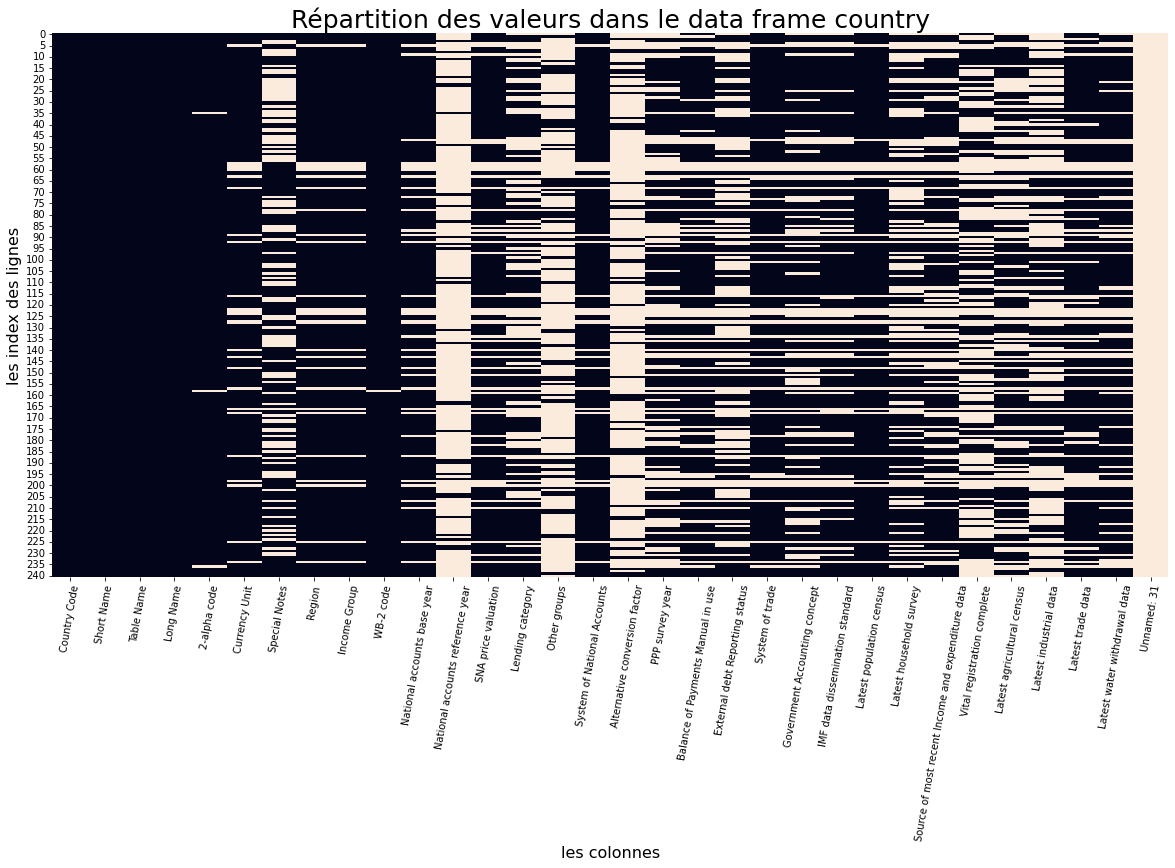

<Figure size 432x288 with 0 Axes>

In [22]:
# les valeurs manquantes dans le DF 'country'
plt.figure(figsize=(20,10))
sns.heatmap(country.isna(), cbar=False)
plt.title('Répartition des valeurs dans le data frame country',size=25)
plt.xlabel("les colonnes", size=16)
plt.xticks(rotation=80)
plt.ylabel("les index des lignes",size=16)
plt.show()
plt.savefig('Répartition des valeurs dans le data frame country')

In [23]:
print ('informations génerales sur le DF country \n' )
country.info()

informations génerales sur le DF country 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                   

C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


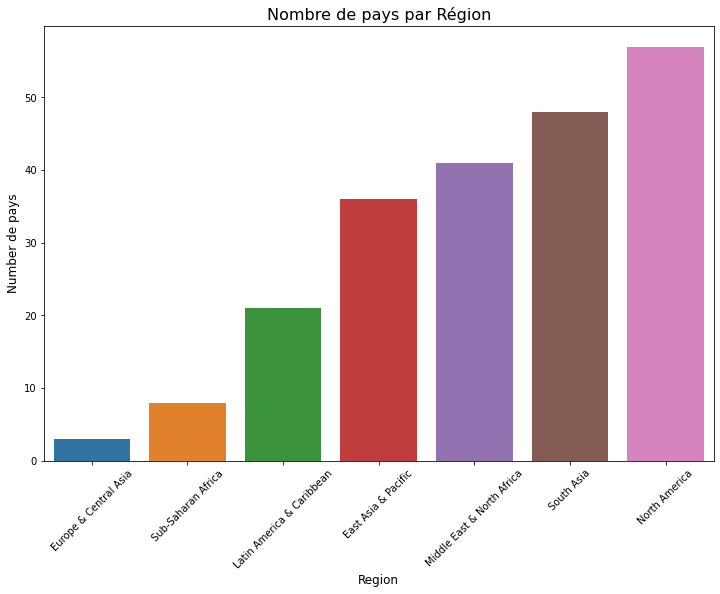

In [24]:
# Nombre des pays par chaque région 
nb_pays_par_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot( (country['Region'].value_counts()).index, nb_pays_par_region['Short Name'].sort_values())
plt.title('Nombre de pays par Région',size=16)
plt.ylabel('Number de pays',fontsize=12)
plt.xlabel('Region',fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [25]:
# Nombre des pays

list_pays=data['Country Code'].unique()
print('Il y a :',len(list_pays),'pays')

Il y a : 242 pays


- Il y a 242 pays dans cette liste, ce qui signifie qu'il y a 25 pays de plus par rapport au nombre de pays trouvés dans le fichier de data.  

In [26]:
# Recherche des pays présent dansEdStatsData.csv mais pas dans EdStatsCountry-Series.csv
df_pays_plus=data[~data['Country Code'].isin(country['Country Code'])][['Country Name']]
df_pays_plus.drop_duplicates(inplace=True)
df_pays_plus

,Country Name
190580,British Virgin Islands


C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


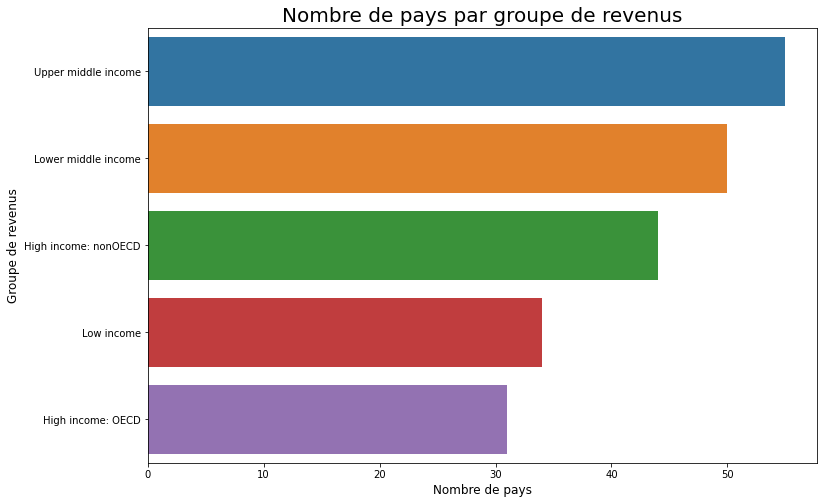

In [27]:
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=20)
plt.show()

- Le dataset contient des informations géographiques sur les pays, les noms des pays, les regroupements pour 7 régions, par groupe de revenus…), des données économiques globales et des dates de référence des dernières études.

### EdStatsSeries

In [28]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print ('informations génerales sur le DF series\n' )
series.info()

informations génerales sur le DF series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     ob

In [30]:
# Nombre des indécatores 

list_indicator=data['Indicator Code'].unique()
print('Il y a :',len(list_indicator),'indicateurs par pays')

Il y a : 3665 indicateurs par pays


#### Grouper les indicateurs  

In [31]:
# Nous allons séparer le code indicateur pour chaque pays. Ce dernier est composé de différentes 
#suites de lettres et de chiffres séparés par ".", qui sera utiliser pour séparer nos indicateur 

series.loc[:,'Series Code'].str.split('.').head()

0    [BAR, NOED, 1519, FE, ZS]
1        [BAR, NOED, 1519, ZS]
2    [BAR, NOED, 15UP, FE, ZS]
3        [BAR, NOED, 15UP, ZS]
4    [BAR, NOED, 2024, FE, ZS]
Name: Series Code, dtype: object

In [32]:
series['groupe_indic']=series.loc[:,'Series Code'].str.split('.').apply(lambda x:x[0])
series['groupe_indic'].head()

0    BAR
1    BAR
2    BAR
3    BAR
4    BAR
Name: groupe_indic, dtype: object

In [33]:
les_groupes = series.loc[:, ['groupe_indic', 'Series Code']]
les_groupes

,groupe_indic,Series Code
0,BAR,BAR.NOED.1519.FE.ZS
1,BAR,BAR.NOED.1519.ZS
2,BAR,BAR.NOED.15UP.FE.ZS
3,BAR,BAR.NOED.15UP.ZS
4,BAR,BAR.NOED.2024.FE.ZS
...,...,...
3660,UIS,UIS.XUNIT.USCONST.3.FSGOV
3661,UIS,UIS.XUNIT.USCONST.4.FSGOV
3662,UIS,UIS.XUNIT.USCONST.56.FSGOV
3663,XGDP,XGDP.23.FSGOV.FDINSTADM.FFD


In [34]:


# le résultat est une série de listes, mais nous n'avons besoin que de la première partie (index=0). 
# c'est pourquoi nous utilisons une fonction lambda qui retourne juste la première partie  

series['groupe_indic']=series.loc[:,'Series Code'].str.split('.').apply(lambda x:x[0])
series['groupe_indic'].head()
 
# les groupes des indicateurs 

les_groupes = series.loc[:, ['groupe_indic', 'Series Code']].\
    drop_duplicates().groupby('groupe_indic').count().\
    reset_index().\
    rename(columns={'Series Code':'Indicator Count'}).\
    sort_values(by= 'Indicator Count',ascending=False)
les_groupes

,groupe_indic,Indicator Count
12,UIS,1047
3,LO,1046
0,BAR,360
6,PRJ,308
1,HH,250
7,SABER,215
11,SP,215
8,SE,173
10,SL,17
5,OECD,16


C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


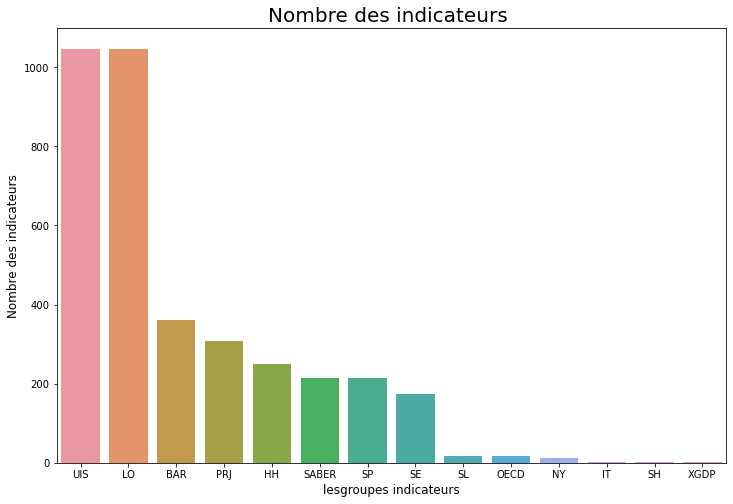

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(les_groupes['groupe_indic'],les_groupes['Indicator Count'])
plt.xlabel('lesgroupes indicateurs', fontsize=12)
plt.ylabel('Nombre des indicateurs', fontsize=12)
plt.title('Nombre des indicateurs ', fontsize=20)
plt.show()

####  Les groups d'indicateurs
 Nous distinguons 14 groupes d'indicateurs les suivants: 
 
**UIS** : Unesco Institute for Statistics

**LO** : Learning Outcomes 

**BAR** : Indicateurs barro-lee, (niveaux d'éducation)

**PRJ** : Projections Wittgenstein (durée de scolarisation, populations..)

**HH** : regroupe DHS (Demographic and Health Surveys) et MICS (Multiple Indicator Cluster Surveys)

**SABER** : System Approach for Better Education

**SP** : Social Population

**SE** : Social Education

**SL** : Social Labor

**OECD** : OCDE, salaires des enseignants du secteur public

**NY** : National Accounts, produits intérieurs et nationaux

**IT** : Infrastructure : utilisateurs internet et ordinateurs

**SH** : Social Health

**XGDP** : Dépenses publiques dans l'éducation

- Pour notre étude, nous nous intéressons aux groupes suivants : BAR, IT, NY, SE, UIS, SP


In [36]:
indic= [ "IT", "NY", "SE", "SP"]

### EdStatsCountry-Series

In [37]:
print ('informations génerales sur le DF country_series \n' )
country_series.info()

informations génerales sur le DF country_series 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [38]:
# Doublons sur les 3 colonnes CountryCode, SeriesCode et DESCRIPTION
print(country_series[country_series.duplicated(['CountryCode', 'SeriesCode', 'DESCRIPTION'], keep=False)].shape[0])

0


In [39]:
# Recherche des noms des pays n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
print (country[~country['Country Code'].isin(country_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name'))

                                         Short Name
5                                        Arab World
47                                          Curaçao
58          East Asia & Pacific (all income levels)
57            East Asia & Pacific (developing only)
63                                        Euro area
60        Europe & Central Asia (all income levels)
59          Europe & Central Asia (developing only)
68                                   European Union
92           Heavily indebted poor countries (HIPC)
89                                      High income
122   Latin America & Caribbean (all income levels)
116     Latin America & Caribbean (developing only)
123    Least developed countries: UN classification
128                             Low & middle income
124                                      Low income
127                             Lower middle income
140  Middle East & North Africa (all income levels)
148    Middle East & North Africa (developing only)
143         

- Les pays en plus dans le jeu de données EdStatsCountry.csv sont :
des noms de région,regroupement de pays (European Union, Arab World..),
 des noms de regroupement de revenus,
 des pays Curaçao , Nauru ,

### EdStatsFootNote 

In [40]:
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [41]:
print ('informations génerales sur le DF foot_note\n' )
foot_note.info()

informations génerales sur le DF foot_note

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


### le bilan :

- **EdStatsData**: données d'environ 4000 indicateurs représentatifs de l'éducation par pays et par année dans un intervalle de 130 années (De 1970 à 2100)
- **EdStatsCountry**: informations concernant les pays incluant les codes pays, monnaies, zones géographiques et notamment catégorie de PIB.
- **EdStatsSeries**: description de chaque indicateur donnés dans EdStatsData.
- **EdStatsCountry-Series**: description, origine de la donnée et commentaires des indicateurs utilisés dans la table pays EdStatsdata.
- **EdStatsFootNote**: description, origine de la donnée et commentaires des indicateurs utilisés dans EdStatsData.

##### - Pas des duplicatas dans tous les fichiers  
##### - Trops de valeurs manquante dans le DF data : Il faut le nettoyer 
##### - Il y a un total de 242 pays et régions.
##### - il y a : 3665 indicateurs par pays groupés en 14 groupe  : Il faut choisir les indicateurs qui nous aident à atteindre notre objectif .

### Utilisation des fichier
- Après une première analyse, nous décidons de n'utiliser que **EdStatsData** pour un table de travail principale et les deux fichiers **EdStatsCountry** et **EdStatsSeries** comme des tables d'informations


# Data Cleaning du DF 'data'

- Avant de commencer, nous allons créer une DF qui contient les informations nécessaires à notre projet en limitant notre choix d'années à la période pour laquelle nous avons repéré le plus de données (de 2000 à 2016).

In [42]:
df_data=data.copy()
df_data =data.drop(columns=df_data.loc[:,'1970':'1999'])
df_data=df_data.drop(columns=df_data.loc[:,'2017':'Unnamed: 69'])
df_data.drop(['Indicator Name',], axis=1, inplace=True)
df_data.head()

,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


In [43]:
# Fusioner les deux data frames (df_data et country)

df_data=df_data.merge(right = country[['Country Code', 'Region', 'Income Group','Currency Unit']],
                      on = 'Country Code')

df_data.head()

,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Region,Income Group,Currency Unit
0,Arab World,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,...,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN


- On remarque que dans la liste des pays (Country name)  il y a des régions comme Europe, Arabic word..
- On va filtrer ces regions par Currency_Unit qui est Nan devant ces regions

In [44]:
df_data.dropna(subset=['Currency Unit'],inplace=True)
df_data.head()

,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Region,Income Group,Currency Unit
91625,Afghanistan,AFG,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,South Asia,Low income,Afghan afghani
91626,Afghanistan,AFG,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,South Asia,Low income,Afghan afghani
91627,Afghanistan,AFG,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,South Asia,Low income,Afghan afghani
91628,Afghanistan,AFG,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,South Asia,Low income,Afghan afghani
91629,Afghanistan,AFG,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income,Afghan afghani


In [45]:
df_data.shape

(787975, 23)

# Choix des indicateurs 

- L'entreprise fournisant du contenu de formation en ligne, les utilisateurs doivent disposer **d'un ordinateur** et **d'un accès à internet**.


- Le public visé étant de niveau **lycée à université**, nous devrons définir par pays quelle est **le nombre d'étudiant** à ce niveau de formation. Nous devrons également définir le taux d'étudiants parmis la population cible. De cette façon nous pourrons identifier les personnes étant susceptible de faire appelle à Academy pour leurs formations. Ces personnes ont entre **15 et 24 ans**.


- Il faut aussi que les personnes soient en **capacités de payer le contenu de formation**. Il est donc important de prendre en compte le **facteur economique** du pays comme le **PIB** qui donne une imformation sur le niveau de vie d'un pays. 


- Pour finir nous devons repondre à la question de **l'évolution du potentiel** de client dans les années à venir. Pour cela nous pouvons soit prendre en compte **la croissance de population dans le pays**. 



 - Donc pour résumer La cible de notre entreprise :

la population des 15-24 ans

le nombre d'étudiants scolarisés au niveau lycée et universités.

le niveau de vie des habitants comparable par pays

les moyens de communication (accès à l'électricité, accès au réseau internet, possession d'un ordinateur personnel).



les différents groupes d'indicateur à étudier sont :


**IT** : Infrastructure

**SE** : Social Education

**SP** : Social Population

**NY** : National Accounts, produits intérieurs et nationaux









In [46]:
indic= ["IT", "NY", "SE", "SP"]

In [47]:
# nous allons définir une liste qui contient tous les indicateurs que nous allons utiliser à partir de dataset Series
#qui définit indicateurs dans Data

df_indic = series[series["groupe_indic"].isin(indic)][['Series Code','Indicator Name','Long definition','groupe_indic']]

df_indic.head()

,Series Code,Indicator Name,Long definition,groupe_indic
610,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computer...,IT
611,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,IT
1658,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...,NY
1659,NY.GDP.MKTP.KD,GDP (constant 2010 US$),GDP at purchaser's prices is the sum of gross ...,NY
1660,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,NY


In [48]:
df_indic.shape

(402, 4)

**les mots clés à rechercher:**

15 : pour la cible de la population des 15-19 ans

20 : pour la cible de la population des 20-24 ans

SEC : pour les regroupements par lycéens

TER : pour les regroupements par étudiants de l'enseignement supérieur

IT : pour l'accès aux infrastructures techniques

TOT : pour population total


In [49]:
# Cible : moyen de communication internet
liste_it=[row for row in df_indic['groupe_indic'] if ('IT') in row ]
df_indic[df_indic['groupe_indic'].isin(liste_it)][['Series Code','Indicator Name','Long definition']]

,Series Code,Indicator Name,Long definition
610,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computer...
611,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...


Les internautes sont des personnes qui ont utilisé l'internet (de n'importe quel endroit),L'internet peut être utilisé via un ordinateur, un téléphone portable...etc, donc l'indicateur IT.CMP.PCMP.P2	n'est pas retenu

Indicateur retenu : **IT.NET.USER.P2** Utilisateurs d'Internet (pour 100 personnes).




In [50]:
# Cible : économie
liste_NY=[row for row in df_indic['groupe_indic'] if ('NY') in row ]
df_indic[df_indic['groupe_indic'].isin(liste_NY)][['Series Code','Indicator Name','Long definition']]

,Series Code,Indicator Name,Long definition
1658,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...
1659,NY.GDP.MKTP.KD,GDP (constant 2010 US$),GDP at purchaser's prices is the sum of gross ...
1660,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...
1661,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",PPP GDP is gross domestic product converted to...
1662,NY.GDP.PCAP.CD,GDP per capita (current US$),GDP per capita is gross domestic product divid...
1663,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),GDP per capita is gross domestic product divid...
1664,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",GDP per capita based on purchasing power parit...
1665,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...
1666,NY.GNP.MKTP.CD,GNI (current US$),GNI (formerly GNP) is the sum of value added b...
1667,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",PPP GNI (formerly PPP GNP) is gross national i...


Indicateur retenu : **NY.GDP.PCAP.PP.CD** RNB par habitant, PPA ($ international actuel).

Généralement, les pays à revenu élevé ont des niveaux de prix plus élevés, tandis que les pays à faible revenu ont des niveaux de prix plus bas. Les comparaisons entre pays basées sur les taux de change du marché pour les composantes du PIB liées aux dépenses reflètent à la fois les différences de production économique et de prix. Les comparaisons entre pays basées sur les PPA du PIB au niveau de ses composantes de dépenses reflètent uniquement les différences de production économique (volume), car les PPA contrôlent les différences de niveau de prix entre les pays. Ainsi, la comparaison reflète la taille réelle des pays.



In [51]:
# Cible : population 
liste_tot=[row for row in df_indic['Series Code'] if ('TOT') in row]
df_indic[df_indic['Series Code'].isin(liste_tot)][['Series Code','Indicator Name']]

,Series Code,Indicator Name
2372,SE.TOT.ENRR,"Gross enrolment ratio, primary to tertiary, bo..."
2373,SE.XPD.CUR.TOTL.ZS,Current expenditure as % of total expenditure ...
2380,SE.XPD.TOTL.GB.ZS,Expenditure on education as % of total governm...
2381,SE.XPD.TOTL.GD.ZS,Government expenditure on education as % of GD...
2590,SP.POP.TOTL,"Population, total"
2591,SP.POP.TOTL.FE.IN,"Population, female"
2592,SP.POP.TOTL.FE.ZS,"Population, female (% of total)"
2593,SP.POP.TOTL.MA.IN,"Population, male"
2594,SP.POP.TOTL.MA.ZS,"Population, male (% of total)"
2595,SP.PRE.TOTL.FE.IN,Population of the official age for pre-primary...


Indicateur retenu : **SP.POP.TOTL** Population Total

In [52]:
# Cible : Population entre 15 et 24 ans

liste_sp=[row for row in df_indic['Series Code'] if ('15') in row]
df_indic[df_indic['Series Code'].isin(liste_sp)][['Series Code','Indicator Name']]

,Series Code,Indicator Name
2209,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f..."
2210,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g..."
2211,SE.ADT.1524.LT.MA.ZS,"Youth literacy rate, population 15-24 years, m..."
2212,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b..."
2450,SP.POP.1015.FE.UN,"Population, ages 10-15, female"
2451,SP.POP.1015.MA.UN,"Population, ages 10-15, male"
2452,SP.POP.1015.TO.UN,"Population, ages 10-15, total"
2462,SP.POP.1115.FE.UN,"Population, ages 11-15, female"
2463,SP.POP.1115.MA.UN,"Population, ages 11-15, male"
2464,SP.POP.1115.TO.UN,"Population, ages 11-15, total"


Indicateur retenu : **SP.POP.1524.TO.UN** Population totale des 15 à 24 ans

In [53]:
# Cible : taux de scolarisation dans le secondaire

liste_sec=[row for row in df_indic['Series Code'] if ('SEC') in row]
df_indic[df_indic['Series Code'].isin(liste_sec)][['Series Code','Indicator Name']]

,Series Code,Indicator Name
2219,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parit..."
2287,SE.SEC.AGES,Official entrance age to lower secondary educa...
2288,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)"
2289,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)"
2290,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)"
2291,SE.SEC.DURS,Theoretical duration of secondary education (y...
2292,SE.SEC.DURS.LO,Theoretical duration of lower secondary educat...
2293,SE.SEC.DURS.UP,Theoretical duration of upper secondary educat...
2294,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (..."
2295,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)"


Indicateur retenu : **SE.SEC.ENRR** taux brut de scolarisation dans le secondaire, pour les deux sexes (%) .

In [54]:
# Cible : taux de scolarisation dans l'enseignement supérieur

liste_ter=[row for row in df_indic['Series Code'] if ('TER') in row]
df_indic[df_indic['Series Code'].isin(liste_ter)][['Series Code','Indicator Name']]

,Series Code,Indicator Name
2220,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity..."
2329,SE.TER.CMPL.FE.ZS,Gross graduation ratio from first degree progr...
2330,SE.TER.CMPL.MA.ZS,Gross graduation ratio from first degree progr...
2331,SE.TER.CMPL.ZS,Gross graduation ratio from first degree progr...
2332,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
2333,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programme..."
2334,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education w...
2335,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)"
2336,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)"
2337,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)"


Indicateur retenu : **SE.TER.ENRR** taux brut de scolarisation dans l'enseignement supérieur, pour les deux sexes (%).

In [55]:

liste_prj=[row for row in df_indic['Series Code'] if ('PRJ') in row]
df_indic[df_indic['Series Code'].isin(liste_prj)][['Series Code','Indicator Name','Long definition']]

,Series Code,Indicator Name,Long definition


In [56]:

indic_final=['SP.POP.1524.TO.UN','SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SP.POP.TOTL' ]


### Bilan : indicateurs retenus

**numérique**
- IT.NET.USER.P2

**économique**
- NY.GNP.PCAP.PP.CD

**démographique** 
- SP.POP.1524.TO.UN
- SP.POP.TOTL

**éducatif**
- SE.SEC.ENRR
- SE.TER.ENRR


In [57]:
# filtrer df_data par nos indicateurs finals

df_final=df_data[df_data['Indicator Code'].isin(indic_final)]
print(f'Nombre de lignes restantes : {df_final.shape[0]}')
df_final.head()

Nombre de lignes restantes : 1290


,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Region,Income Group,Currency Unit
92877,Afghanistan,AFG,NY.GNP.PCAP.PP.CD,NaN,NaN,8.700000e+02,9.200000e+02,9.200000e+02,1.010000e+03,1.070000e+03,...,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1900.000000,South Asia,Low income,Afghan afghani
92960,Afghanistan,AFG,SE.SEC.ENRR,NaN,1.304874e+01,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,...,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN,South Asia,Low income,Afghan afghani
92964,Afghanistan,AFG,SE.TER.ENRR,NaN,NaN,NaN,1.256840e+00,1.256030e+00,NaN,NaN,...,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN,South Asia,Low income,Afghan afghani
93000,Afghanistan,AFG,IT.NET.USER.P2,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,...,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,10.595726,South Asia,Low income,Afghan afghani
94107,Afghanistan,AFG,SP.POP.1524.TO.UN,3979438.0,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,...,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,NaN,South Asia,Low income,Afghan afghani


In [58]:
df_final.shape

(1290, 23)

In [59]:
# supprimer les pays qui ne comprennent pas de régions 
df_final.dropna(subset=['Region'],inplace=True)
df_final.head()

C:\Users\karim\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Region,Income Group,Currency Unit
92877,Afghanistan,AFG,NY.GNP.PCAP.PP.CD,NaN,NaN,8.700000e+02,9.200000e+02,9.200000e+02,1.010000e+03,1.070000e+03,...,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1900.000000,South Asia,Low income,Afghan afghani
92960,Afghanistan,AFG,SE.SEC.ENRR,NaN,1.304874e+01,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,...,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN,South Asia,Low income,Afghan afghani
92964,Afghanistan,AFG,SE.TER.ENRR,NaN,NaN,NaN,1.256840e+00,1.256030e+00,NaN,NaN,...,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN,South Asia,Low income,Afghan afghani
93000,Afghanistan,AFG,IT.NET.USER.P2,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,...,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,10.595726,South Asia,Low income,Afghan afghani
94107,Afghanistan,AFG,SP.POP.1524.TO.UN,3979438.0,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,...,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,NaN,South Asia,Low income,Afghan afghani


In [60]:
df_final.shape

(1284, 23)

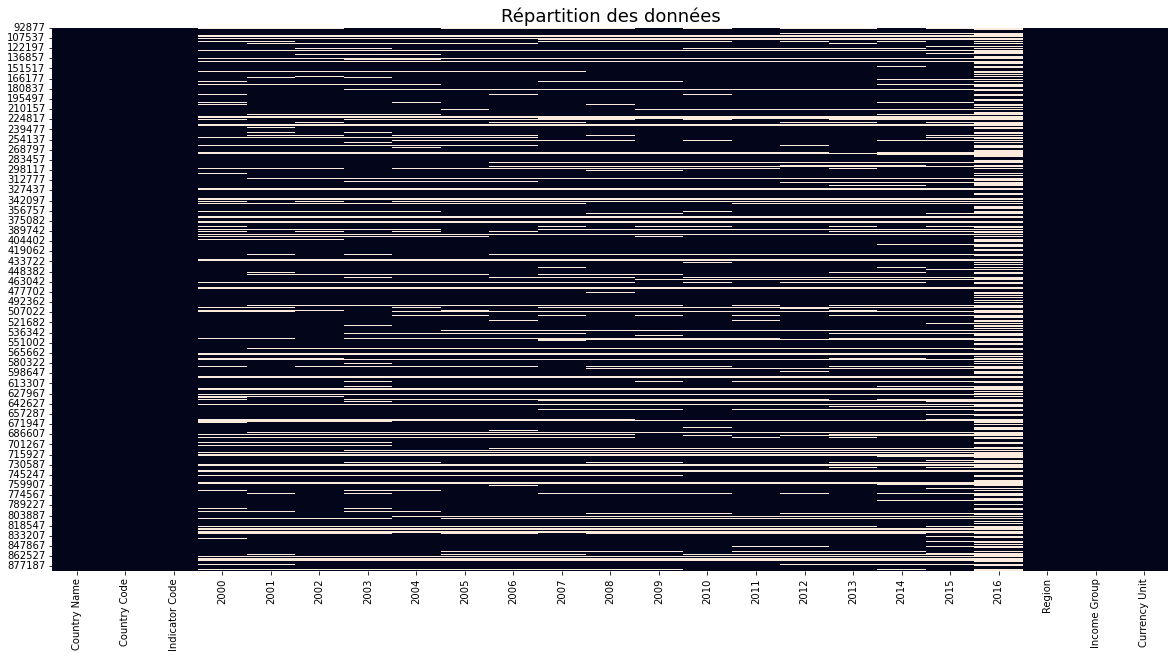

In [61]:
# Répartition des données sur notre DF
plt.figure(figsize=(20,10))
sns.heatmap(df_final.isna(), cbar=False)
plt.title("Répartition des données",size=18)
plt.show()

## Analyse des indicateurs retenus

- nous allons définir une fonction qui nous donne la dernière année dont la valeur n'est pas nulle et sa valeur



In [62]:
# Fonction qui permet de renseigner la derniere années ou la valeurs est non null  : 
def annee_valeur(row):
    if row.first_valid_index() is None:
        return None
    else:
        return (row.first_valid_index(),row[row.first_valid_index()])

In [63]:
df_final[[' Dernière Année Valeur Non Null','Dernière Valeur Non Null']] = \
           df_final.loc[:,'2016':'2000':-1]\
                    .apply(lambda row: pd.Series(annee_valeur(row)), axis=1)
df_final.head()

C:\Users\karim\AppData\Local\Temp/ipykernel_6192/2671876172.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(lambda row: pd.Series(annee_valeur(row)), axis=1)
C:\Users\karim\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,Region,Income Group,Currency Unit,Dernière Année Valeur Non Null,Dernière Valeur Non Null
92877,Afghanistan,AFG,NY.GNP.PCAP.PP.CD,NaN,NaN,8.700000e+02,9.200000e+02,9.200000e+02,1.010000e+03,1.070000e+03,...,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1900.000000,South Asia,Low income,Afghan afghani,2016,1.900000e+03
92960,Afghanistan,AFG,SE.SEC.ENRR,NaN,1.304874e+01,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,...,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN,South Asia,Low income,Afghan afghani,2015,5.564441e+01
92964,Afghanistan,AFG,SE.TER.ENRR,NaN,NaN,NaN,1.256840e+00,1.256030e+00,NaN,NaN,...,NaN,NaN,8.662800e+00,NaN,NaN,South Asia,Low income,Afghan afghani,2014,8.662800e+00
93000,Afghanistan,AFG,IT.NET.USER.P2,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,...,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,10.595726,South Asia,Low income,Afghan afghani,2016,1.059573e+01
94107,Afghanistan,AFG,SP.POP.1524.TO.UN,3979438.0,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,...,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,NaN,South Asia,Low income,Afghan afghani,2015,7.252785e+06


### Data Visualisation pour la DF pour chaque indicateur

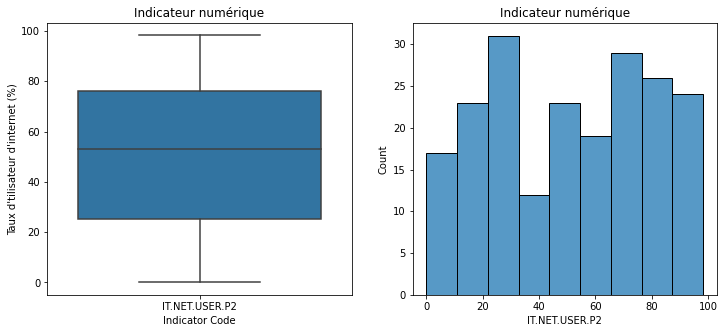

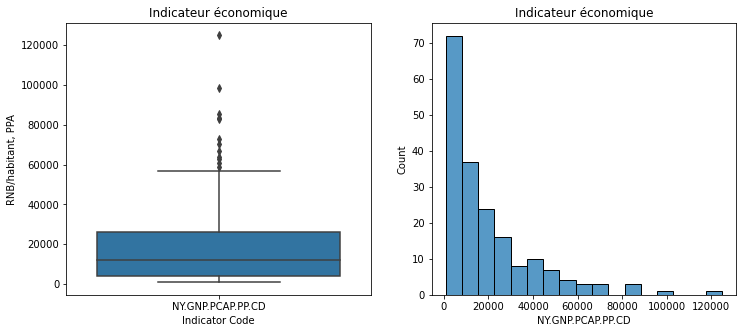

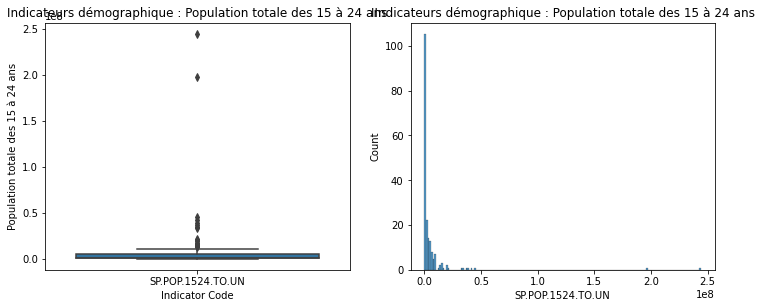

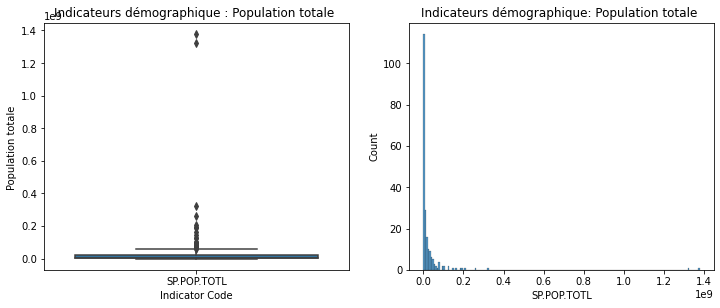

In [64]:
#-------------------------------------------------------
# Indicateur numérique
#-------------------------------------------------------

df_num=df_final[df_final['Indicator Code'] == 'IT.NET.USER.P2']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( x=df_num['Indicator Code'], y=df_num['Dernière Valeur Non Null'],  )
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')

plt.subplot(1,2,2)
sns.histplot(df_num['Dernière Valeur Non Null'] )
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')
plt.show()

#-------------------------------------------------------
# Indicateur économique
#-------------------------------------------------------
df_eco=df_final[df_final['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( x=df_eco['Indicator Code'], y=df_eco['Dernière Valeur Non Null'],  )
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA')

plt.subplot(1,2,2)
sns.histplot(df_eco['Dernière Valeur Non Null'])
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')
plt.show()

#-------------------------------------------------------
# Indicateurs démographique
#-------------------------------------------------------
df_pop_l_u=df_final[df_final['Indicator Code'] == 'SP.POP.1524.TO.UN']
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot( x=df_pop_l_u['Indicator Code'], y=df_pop_l_u['Dernière Valeur Non Null'],  )
plt.title('Indicateurs démographique : Population totale des 15 à 24 ans')
plt.ylabel('Population totale des 15 à 24 ans')

plt.subplot(2,2,2)
sns.histplot(df_pop_l_u['Dernière Valeur Non Null'])
plt.title('IIndicateurs démographique : Population totale des 15 à 24 ans')
plt.xlabel('SP.POP.1524.TO.UN')
plt.show()

   #-------------------------------------------------------
    
df_pop_t=df_final[df_final['Indicator Code'] == 'SP.POP.TOTL']
plt.figure(figsize=(12,10))
plt.subplot(2,2,3)
sns.boxplot( x=df_pop_t['Indicator Code'], y=df_pop_t['Dernière Valeur Non Null'],  )
plt.title('Indicateurs démographique : Population totale ')
plt.ylabel('Population totale ')

plt.subplot(2,2,4)
sns.histplot(df_pop_t['Dernière Valeur Non Null'])
plt.title('Indicateurs démographique: Population totale ')
plt.xlabel('SP.POP.TOTL')
plt.show()




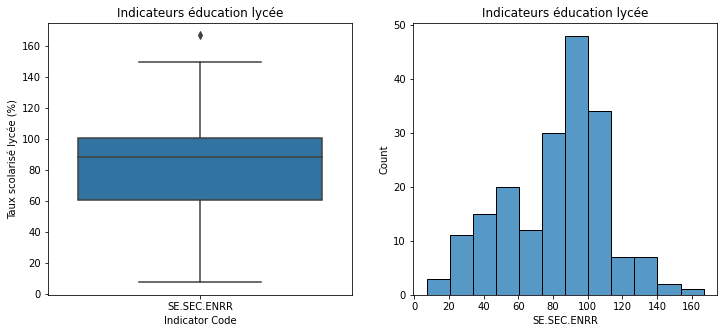

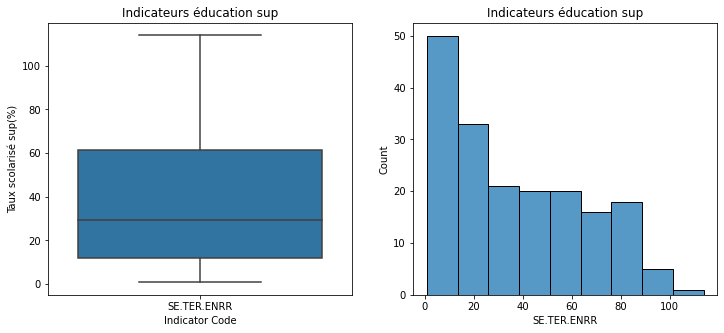

In [65]:
#-------------------------------------------------------
# Indicateurs éducation
#-------------------------------------------------------

df_educ_sec=df_final[df_final['Indicator Code'] == 'SE.SEC.ENRR']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( x=df_educ_sec['Indicator Code'], y=df_educ_sec['Dernière Valeur Non Null'],  )
plt.title('Indicateurs éducation lycée')
plt.ylabel('Taux scolarisé lycée (%)')

plt.subplot(1,2,2)
sns.histplot(df_educ_sec['Dernière Valeur Non Null'])
plt.title('Indicateurs éducation lycée')
plt.xlabel('SE.SEC.ENRR')
plt.show()

#-------------------------------------------------------

df_educ_ter=df_final[df_final['Indicator Code'] == 'SE.TER.ENRR']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( x=df_educ_ter['Indicator Code'], y=df_educ_ter['Dernière Valeur Non Null']  )
plt.title('Indicateurs éducation sup')
plt.ylabel('Taux scolarisé sup(%)')

plt.subplot(1,2,2)
sns.histplot(df_educ_ter['Dernière Valeur Non Null'])
plt.title('Indicateurs éducation sup')
plt.xlabel('SE.TER.ENRR')
plt.show()

- Présence d'outliers (valeurs aberrantes) pour les indicateurs démographique, économique et éducatif au niveau lycée.
- Le taux de scolarisation dans l'enseignement supérieur est plus inégal entre les pays que le taux de scolarisation au niveau lycée.
- Pour l'indicateur numérique, forme bimodale
- 


In [67]:
# création d'un tableau pivo pour les pays  

pays_final = df_final.pivot_table(index= 'Country Name', columns="Indicator Code")['Dernière Valeur Non Null']
pays_final=pays_final.rename_axis('Country Name').reset_index()#la colonne country_name devient colonne et non index
pays_final.head()

Indicator Code,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL
0,Afghanistan,10.595726,1900.0,55.644409,8.662800,7252785.0,34656032.0
1,Albania,66.363445,11670.0,95.765488,58.109951,556269.0,2876101.0
2,Algeria,42.945527,14420.0,99.860191,36.922279,6467818.0,40606052.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,55599.0
4,Andorra,97.930637,NaN,NaN,NaN,8715.0,77281.0


In [68]:
# Liste des pays avec au moins un indicateur manquant
pays_indic_manquant=pays_final.notnull().sum(axis=1)
l_pays_indic_manquant=pays_indic_manquant[pays_indic_manquant<7].index
print(f'Nombre de pays à retirer : {len(l_pays_indic_manquant)}')
pays_indic_manquant =pays_final[pays_final.isnull().any(axis=1)]
pays_indic_manquant

Nombre de pays à retirer : 45


Indicator Code,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL
3,American Samoa,NaN,NaN,NaN,NaN,NaN,55599.0
4,Andorra,97.930637,NaN,NaN,NaN,8715.0,77281.0
9,Aruba,93.542454,NaN,111.174522,15.273780,14455.0,104822.0
12,Azerbaijan,78.200000,16150.0,NaN,25.483200,1544146.0,9762274.0
13,"Bahamas, The",80.000000,21680.0,92.633682,NaN,61260.0,391232.0
24,Bosnia and Herzegovina,69.331006,12350.0,NaN,22.108311,489754.0,3516816.0
35,Cayman Islands,79.000000,NaN,NaN,NaN,5789.0,60765.0
38,Channel Islands,NaN,NaN,NaN,NaN,NaN,164541.0
48,Cuba,38.765867,NaN,100.399872,36.280399,1421630.0,11475982.0
49,Curacao,NaN,NaN,88.345543,20.312639,NaN,153500.0


In [69]:
# On ne conserve que les pays avec les 6 indicateurs renseignés
pays_final.dropna(thresh = 7, inplace=True)
print(f'Nombre de pays restant : {pays_final.shape[0]}')

pays_final.head(35)

Nombre de pays restant : 169


Indicator Code,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL
0,Afghanistan,10.595726,1900.0,55.644409,8.662800,7252785.0,3.465603e+07
1,Albania,66.363445,11670.0,95.765488,58.109951,556269.0,2.876101e+06
2,Algeria,42.945527,14420.0,99.860191,36.922279,6467818.0,4.060605e+07
5,Angola,13.000000,6100.0,28.898720,9.308020,4259352.0,2.881346e+07
6,Antigua and Barbuda,73.000000,22130.0,102.705460,23.486240,13588.0,1.009630e+05
7,Argentina,70.150764,19530.0,106.777901,82.917389,6886530.0,4.384743e+07
8,Armenia,62.000000,9040.0,88.502357,44.309502,446958.0,2.924816e+06
10,Australia,88.238658,45970.0,137.564789,90.306503,2914620.0,2.412716e+07
11,Austria,84.323331,50620.0,100.021889,81.540512,964629.0,8.747358e+06
14,Bahrain,97.999981,44250.0,102.130898,43.263229,132609.0,1.425171e+06


In [70]:
pays_final.drop(34,inplace=True)# elimination du canada à cause de l'absence du taux de scolarisation dans l'enseignement supérieur 


In [71]:
pays_final.shape

(168, 7)

## Calcul du score 

In [72]:
def Score(x,p,pas): # fonction pour le calcule d percentile 
    q=[]
    for i in range (1,pas+1):
        q += [i/pas] # choix de pourcentage 
    quantiles = df_score.quantile(q) 
    for j in range (1,pas+1):
        if x<=quantiles[p][j/pas]:
            return j  

In [73]:
# Remplissage du table
df_score=pays_final.copy()
for j in range (1,7): # choix des colonnes 
    nom =df_score.columns[j]
    df_score['scor',df_score.columns[j]]=df_score[nom].apply(Score, args=(nom,50),) # le score associé pour chaque indicateur 
df_score.head()


Indicator Code,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL,"(scor, IT.NET.USER.P2)","(scor, NY.GNP.PCAP.PP.CD)","(scor, SE.SEC.ENRR)","(scor, SE.TER.ENRR)","(scor, SP.POP.1524.TO.UN)","(scor, SP.POP.TOTL)"
0,Afghanistan,10.595726,1900.0,55.644409,8.662800,7252785.0,34656032.0,4,6,12,9,42,39
1,Albania,66.363445,11670.0,95.765488,58.109951,556269.0,2876101.0,34,25,33,36,17,15
2,Algeria,42.945527,14420.0,99.860191,36.922279,6467818.0,40606052.0,22,27,37,28,41,41
5,Angola,13.000000,6100.0,28.898720,9.308020,4259352.0,28813463.0,6,17,2,10,36,37
6,Antigua and Barbuda,73.000000,22130.0,102.705460,23.486240,13588.0,100963.0,37,35,41,23,2,2


In [74]:
df_scor_final= df_score.copy() # DF des scores 
df_scor_final=df_scor_final.drop(df_scor_final.columns[[1,2,3,4,5,6]], axis='columns') # supression des colonnes des indicateurs
df_scor_final.set_axis(['Country Name', 'Num', 'Eco','Edu_sec','Edu_ter','Pop_1524','Pop_tot'], #changer les noms des colonnes
                    axis='columns', inplace=True)
df_scor_final.head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot
0,Afghanistan,4,6,12,9,42,39
1,Albania,34,25,33,36,17,15
2,Algeria,22,27,37,28,41,41
5,Angola,6,17,2,10,36,37
6,Antigua and Barbuda,37,35,41,23,2,2


In [75]:
# fonction pour calculr le score final 
coef=[1,1,1,1,1,1] # list pour des coefficients attribué pour chaque indicateur: coef[0]est le poids attribué pour le 1er indicateur et coef[1] pour le 2eme indicateurs ..ect 

def calcul_score (df,coef):
    n=len(coef)
    s=0 # pour calculer la somme
    for i in range (1,n+1):
        s += df.iloc[:,i]*coef[i-1] # la somme des produits 
    score= s/sum(coef) # calcul des moyens 
    return round(score,2)


In [76]:
#calcul de score final pour des coefficients égales à 1 
df_scor_final['Score_tot']=calcul_score (df_scor_final,coef)
df_scor_final=df_scor_final.sort_values(by='Score_tot',ascending=False)
df_scor_final.head(10)

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
203,United States,39,48,34,48,50,50,44.83
95,Japan,48,44,39,39,46,48,44.00
202,United Kingdom,49,43,48,36,43,45,44.00
71,Germany,47,45,40,41,43,46,43.67
175,Spain,43,42,49,49,36,42,43.50
66,France,45,44,45,39,42,45,43.33
101,"Korea, Rep.",48,42,35,50,41,43,43.17
10,Australia,46,45,50,49,33,36,43.17
157,Russian Federation,40,35,42,45,47,48,42.83
136,Netherlands,47,46,49,45,29,33,41.50


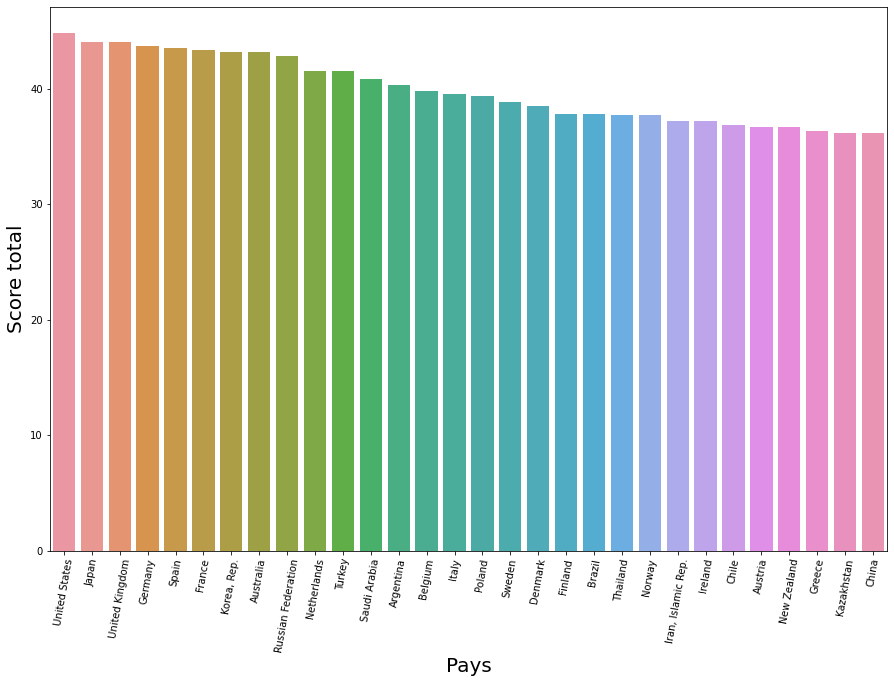

In [80]:
#Classement des 30 premiers pays 
fig = plt.figure(figsize=(15,10))

chart = sns.barplot(y='Score_tot',x='Country Name',data=df_scor_final[0:30])

chart.set_xlabel('Pays',fontsize = 20)
plt.xticks(rotation=80)
chart.set_ylabel('Score total', fontsize = 20)


plt.show()

### Score d'attractivité par région et par groupe de revenus

#### Score d'attractivité par région

In [83]:
# Ajout de la région et du groupe de revenus
df_region_income = pd.DataFrame({'Country Name' : df_final['Country Name'], 
                                 'Region' : df_final['Region'], 
                                 'Income Group' : df_final['Income Group']})
df_scor_region_income = pd.merge(df_scor_final, df_region_income, left_on='Country Name', right_on='Country Name', how='inner')
df_scor_region_income.drop_duplicates(inplace=True)
df_scor_region_income.sort_values(by='Score_tot',ascending=False).head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot,Region,Income Group
0,United States,39,48,34,48,50,50,44.83,North America,High income: OECD
12,United Kingdom,49,43,48,36,43,45,44.00,Europe & Central Asia,High income: OECD
6,Japan,48,44,39,39,46,48,44.00,East Asia & Pacific,High income: OECD
18,Germany,47,45,40,41,43,46,43.67,Europe & Central Asia,High income: OECD
24,Spain,43,42,49,49,36,42,43.50,Europe & Central Asia,High income: OECD


In [84]:
# Constitution du dataframe de visualisation du regroupement par pays
df_score_region = df_scor_region_income.groupby('Region').mean()
df_score_region=df_score_region.sort_values(by='Score_tot',ascending=False)
df_score_region

,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
Region,,,,,,,
North America,44.500000,48.500000,25.500000,36.000000,25.500000,25.500000,34.250000
Europe & Central Asia,37.954545,36.613636,39.795455,38.250000,23.727273,25.840909,33.696818
Middle East & North Africa,29.235294,30.705882,26.294118,27.411765,27.294118,27.647059,28.098235
Latin America & Caribbean,28.107143,27.107143,28.500000,29.964286,22.785714,22.000000,26.410714
East Asia & Pacific,26.833333,27.583333,27.541667,27.708333,23.291667,23.208333,26.027917
South Asia,14.750000,17.000000,17.750000,16.125000,34.875000,34.000000,22.418750
Sub-Saharan Africa,10.622222,11.044444,9.644444,9.555556,27.755556,26.244444,15.810889


Text(0.5, 1.0, 'Répartition des indicateurs économique et numérique par région ')

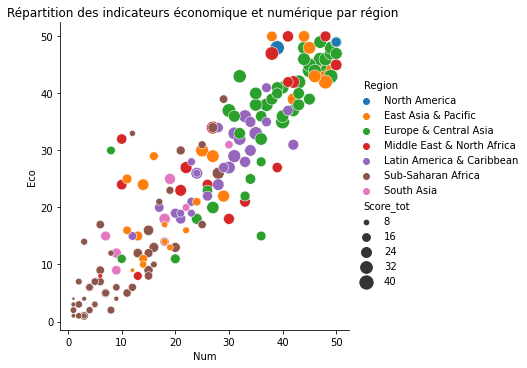

In [85]:

sns.relplot(x='Num', y='Eco', data=df_scor_region_income,hue='Region',size='Score_tot',sizes=(10,200))

plt.title("Répartition des indicateurs économique et numérique par région ",size=12)

Text(0.5, 1.0, "Répartition des indicateurs d'education par région ")

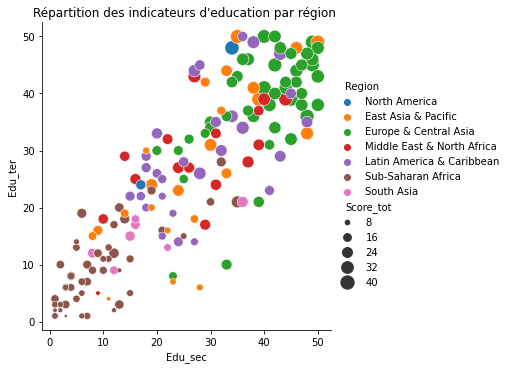

In [86]:
figsize=(20, 10)
sns.relplot(x='Edu_sec', y='Edu_ter', data=df_scor_region_income,hue='Region',size='Score_tot',sizes=(10,200))

plt.title("Répartition des indicateurs d'education par région ",size=12)

Text(0.5, 1.0, 'Répartition des indicateurs numérique et taux de scolarisation Sec par région ')

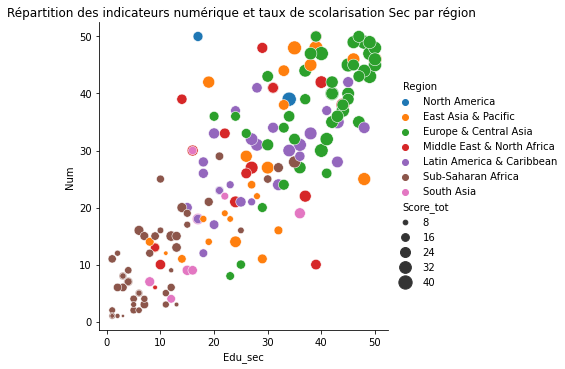

In [87]:
figsize=(20, 10)
sns.relplot(x='Edu_sec', y='Num', data=df_scor_region_income,hue='Region',size='Score_tot',sizes=(10,200))

plt.title("Répartition des indicateurs numérique et taux de scolarisation Sec par région ",size=12)

Text(0.5, 1.0, 'Répartition des indicateurs numérique et taux de scolarisation TER par région ')

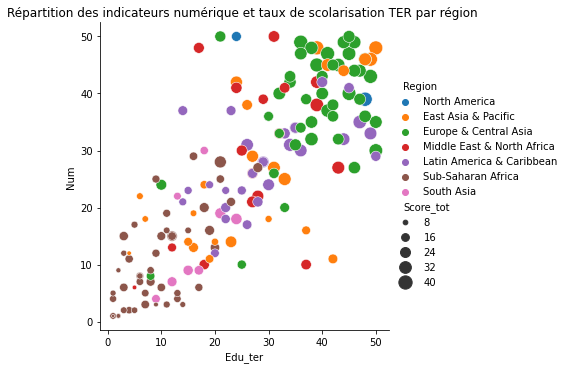

In [88]:
figsize=(20, 10)
sns.relplot(x='Edu_ter', y='Num', data=df_scor_region_income,hue='Region',size='Score_tot',sizes=(10,200))

plt.title("Répartition des indicateurs numérique et taux de scolarisation TER par région ",size=12)

- Les régions présentant le plus fort potentiel de clientèle sont l'Europe et l'Asie centrale.

- En revanche, l'Afrique subsaharienne semble la moins prometteuse.

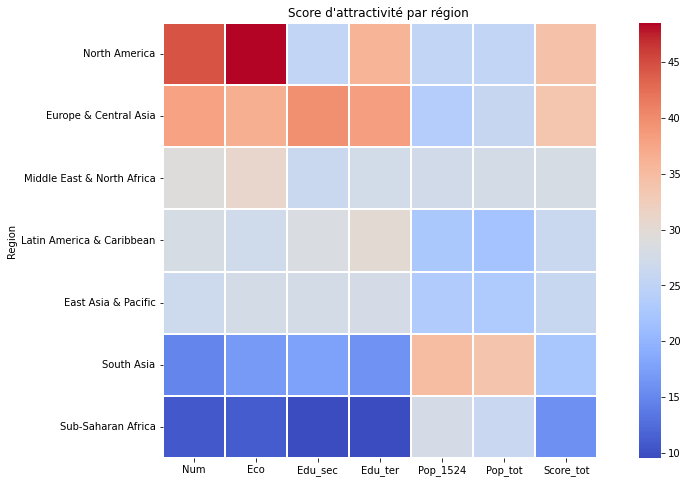

In [89]:
fig = plt.figure(1, figsize=(15, 8))
sns.heatmap(df_score_region, square=True, linewidths=0.1, cmap='coolwarm')
plt.title('Score d\'attractivité par région ')
plt.show()

**nous distinguons trois régions avec un score élevé**
- North America,
- Europe & Central Asia
- Middle East & North Africa

### Visualisation des indicateurs par région

#### Score d'attractivité par groupe de revenus

In [90]:
# Constitution du dataframe de visualisation du regroupement par groupe de revenus
df_score_income = df_scor_region_income.groupby('Income Group').mean()
df_score_income=df_score_income.sort_values(by='Score_tot',ascending=False)
df_score_income

,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
Income Group,,,,,,,
High income: OECD,43.700000,43.633333,43.466667,42.533333,26.533333,29.200000,38.177333
High income: nonOECD,39.700000,41.550000,33.500000,32.250000,11.900000,13.400000,28.716500
Upper middle income,27.021739,28.456522,28.021739,28.673913,24.673913,24.673913,26.920652
Lower middle income,18.146341,16.219512,19.341463,19.463415,26.536585,25.365854,20.845610
Low income,6.161290,5.483871,7.354839,7.935484,33.129032,31.129032,15.199032


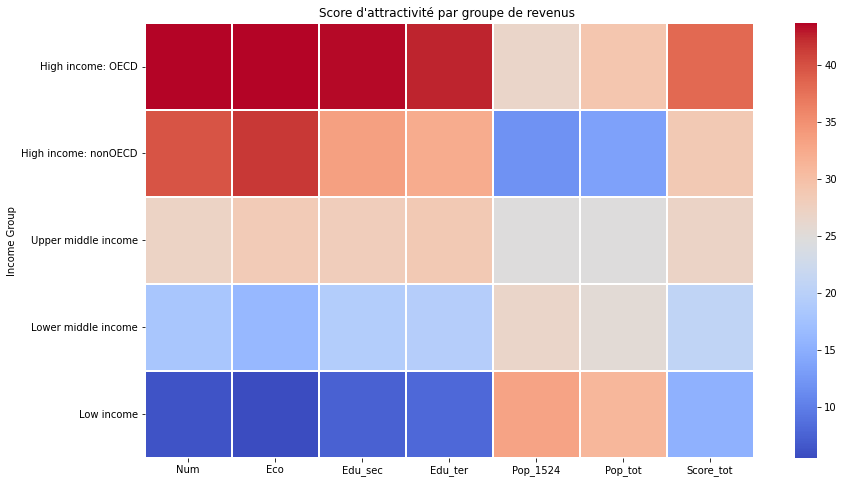

In [92]:
fig = plt.figure(1, figsize=(15, 8))
sns.heatmap(df_score_income, square=True, linewidths=0.1, cmap='coolwarm')
plt.title('Score d\'attractivité par groupe de revenus ')
plt.show()

**Les groupes de revenus les plus attractifs sont**
- High income OECD 
- High income non OECD
- Upper middle income

## Top 10 des pays

In [101]:
df_top10 = df_scor_region_income[['Country Name','Region','Income Group','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10['Place']=np.arange(1, 11,)
df_top10.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10.set_index('Place')

,Pays,Region,Income Group,Score_tot
Place,,,,
1,United States,North America,High income: OECD,44.83
2,United Kingdom,Europe & Central Asia,High income: OECD,44.00
3,Japan,East Asia & Pacific,High income: OECD,44.00
4,Germany,Europe & Central Asia,High income: OECD,43.67
5,Spain,Europe & Central Asia,High income: OECD,43.50
6,France,Europe & Central Asia,High income: OECD,43.33
7,"Korea, Rep.",East Asia & Pacific,High income: OECD,43.17
8,Australia,East Asia & Pacific,High income: OECD,43.17
9,Russian Federation,Europe & Central Asia,High income: nonOECD,42.83


- Les 10 pays les plus attractifs font bien parties 
- des 3 régions :

Europe & Central Asia(6 pays) 

East Asia & Pacific (3 pays) 

North America (1 pays) 

- des 3 groupes de revenus :

High income: OECD

High income: nonOECD

Upper middle income

### Représentation cartographique des top 10 des pays 

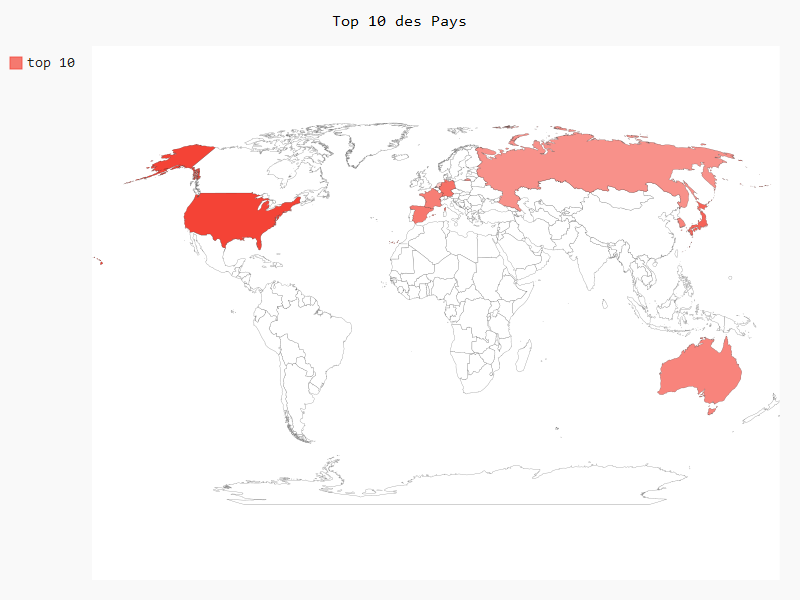

In [2]:
# Pour cartographie les pays on utilise le module Pygal 

from pygal_maps_world.maps import World
from pygal.style import Style
  
# create a Style object
custom_style = Style( colors = ('#FF0000' , '#0000FF' ,
                                '#00FF00' , '#000000',
                                '#FFD700','#FFFF00',"#800000"))
worldmap_chart = World()
worldmap_chart.title = 'Top 10 des Pays'
worldmap_chart.add('top 10', 
                   { # attribuer le score de chaque pays
        'us' : 44.83, 
        'uk' : 44, 
        'jp' : 44, 
        'de' : 43.67, 
        'es' : 43.50, 
        'fr' : 43.33, 
        'kr' : 43.17, 
        'au' : 43.17, 
        'ru' : 42.83, 
        'nl' : 41.5
        
}) 
  
worldmap_chart.render_to_file('chart.svg')
worldmap_chart 

#### graphique relplot représentant l'ensemble des pays candidats

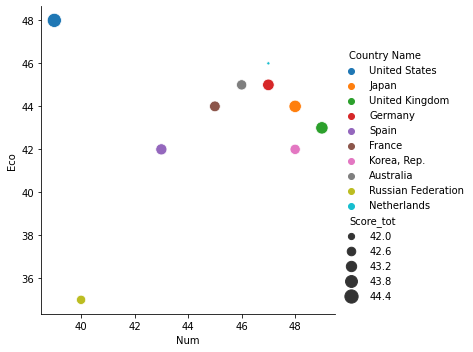

In [102]:
figsize=(20, 10)
sns.relplot(x='Num', y='Eco', data=df_scor_region_income[0:10],hue='Country Name',size='Score_tot',sizes=(10,200))

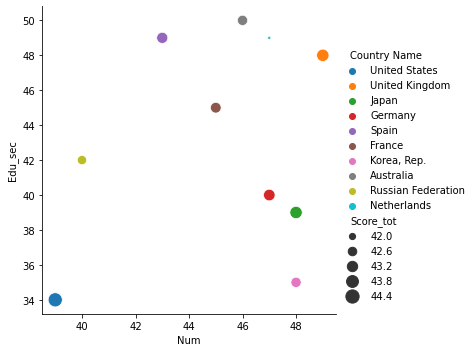

In [810]:
figsize=(20, 10)
sns.relplot(x='Num', y='Edu_sec', data=df_scor_region_income[0:10],hue='Country Name',size='Score_tot',sizes=(10,200))

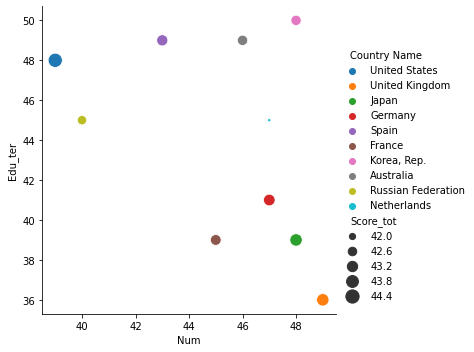

In [811]:
figsize=(20, 10)
sns.relplot(x='Num', y='Edu_ter', data=df_scor_region_income[0:10],hue='Country Name',size='Score_tot',sizes=(10,200))

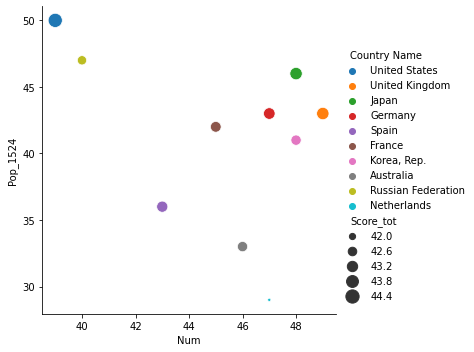

In [812]:
figsize=(20, 10)
sns.relplot(x='Num', y='Pop_1524', data=df_scor_region_income[0:10],hue='Country Name',size='Score_tot',sizes=(10,200))

## recommandation des pays en fonction des indicateurs 

### Etude par rapport au indicateur économique 

In [791]:
df_scor_final_Eco=df_scor_final.copy()
coef_Eco=[1,2,1,1,1,1] # on multiplier la le score économique 'Eco' par 2 (ceof[1]=2)
df_scor_final_Eco['Score_tot']=calcul_score (df_scor_final_Eco,coef_Eco)
df_scor_final_Eco=df_scor_final_Eco.sort_values(by='Score_tot',ascending=False)
df_scor_final_Eco.head()


,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
203,United States,39,48,34,48,50,50,45.29
95,Japan,48,44,39,39,46,48,44.00
202,United Kingdom,49,43,48,36,43,45,43.86
71,Germany,47,45,40,41,43,46,43.86
66,France,45,44,45,39,42,45,43.43


In [792]:
df_top10_Eco = df_scor_final_Eco[['Country Name','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10_Eco['Place']=np.arange(1, 11,)
df_top10_Eco.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_Eco.set_index('Place')
df_top10_Eco

,Pays,Score_tot,Place
203,United States,45.29,1
95,Japan,44.00,2
202,United Kingdom,43.86,3
71,Germany,43.86,4
66,France,43.43,5
10,Australia,43.43,6
175,Spain,43.29,7
101,"Korea, Rep.",43.00,8
136,Netherlands,42.14,9
162,Saudi Arabia,41.71,10


- les quatre premiers pays sont toujours les mêmes 
- la Arabie saoudite est entre dans le classement de top 10 

### Etude par rapport au indicateur numerique

In [793]:
df_scor_final_Num=df_scor_final.copy()
coef_Num=[2,1,1,1,1,1]# on multiplier la le score numérique 'Num' par 2 (ceof[0]=2)
df_scor_final_Num['Score_tot']=calcul_score (df_scor_final_Num,coef_Num)
df_scor_final_Num=df_scor_final_Num.sort_values(by='Score_tot',ascending=False)
df_scor_final_Num.head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
202,United Kingdom,49,43,48,36,43,45,44.71
95,Japan,48,44,39,39,46,48,44.57
71,Germany,47,45,40,41,43,46,44.14
203,United States,39,48,34,48,50,50,44.00
101,"Korea, Rep.",48,42,35,50,41,43,43.86


In [794]:
df_top10_Num = df_scor_final_Num[['Country Name','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10_Num['Place']=np.arange(1, 11,)
df_top10_Num.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_Num.set_index('Place')
df_top10_Num

,Pays,Score_tot,Place
202,United Kingdom,44.71,1
95,Japan,44.57,2
71,Germany,44.14,3
203,United States,44.00,4
101,"Korea, Rep.",43.86,5
10,Australia,43.57,6
66,France,43.57,7
175,Spain,43.43,8
157,Russian Federation,42.43,9
136,Netherlands,42.29,10


- les États-Unis perdent 3 places et se classent en 4ème position 
- L'Australie, le Royaume-Uni et la Corée ont gagné 2 places dans le classement. 

### Etude par rapport au indicateur population entre 15 et 24 ans 

In [795]:
df_scor_final_pop1524=df_scor_final.copy()
coef_pop1524=[1,1,1,1,2,1]# on multiplier la le score démographique 'Pop_1524' par 2 (ceof[4]=2)
df_scor_final_pop1524['Score_tot']=calcul_score (df_scor_final_pop1524,coef_pop1524)
df_scor_final_pop1524=df_scor_final_pop1524.sort_values(by='Score_tot',ascending=False)
df_scor_final_pop1524.head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
203,United States,39,48,34,48,50,50,45.57
95,Japan,48,44,39,39,46,48,44.29
202,United Kingdom,49,43,48,36,43,45,43.86
71,Germany,47,45,40,41,43,46,43.57
157,Russian Federation,40,35,42,45,47,48,43.43


In [796]:
df_top10_pop1524 = df_scor_final_pop1524[['Country Name','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10_pop1524['Place']=np.arange(1, 11,)
df_top10_pop1524.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_pop1524.set_index('Place')
df_top10_pop1524

,Pays,Score_tot,Place
203,United States,45.57,1
95,Japan,44.29,2
202,United Kingdom,43.86,3
71,Germany,43.57,4
157,Russian Federation,43.43,5
66,France,43.14,6
101,"Korea, Rep.",42.86,7
175,Spain,42.43,8
195,Turkey,42.14,9
10,Australia,41.71,10


- les quatre premiers pays sont les mêmes pour le premier classemnt
- La Turquie est entrée dans le top 10 du classement en 9eme place 
- la Russie a gagné 4 places dans le classement. 


### Etude par rapport au indicateur de taux de scolarisation  

In [798]:
df_scor_final_Edu=df_scor_final.copy()
coef_Edu=[1,1,2,2,1,1]# on multiplier la le score d'education 'Edu_sec 'et 'Edu_ter' par 2 (ceof[2]=2et coef[3]=2)
df_scor_final_Edu['Score_tot']=calcul_score (df_scor_final_Edu,coef_Edu)
df_scor_final_Edu=df_scor_final_Edu.sort_values(by='Score_tot',ascending=False)
df_scor_final_Edu.head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
175,Spain,43,42,49,49,36,42,44.88
10,Australia,46,45,50,49,33,36,44.75
203,United States,39,48,34,48,50,50,43.88
202,United Kingdom,49,43,48,36,43,45,43.50
66,France,45,44,45,39,42,45,43.00


In [797]:
df_top10_Edu = df_scor_final_Edu[['Country Name','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10_Edu['Place']=np.arange(1, 11,)
df_top10_Edu.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_Edu.set_index('Place')
df_top10_Edu

,Pays,Score_tot,Place
175,Spain,44.88,1
10,Australia,44.75,2
203,United States,43.88,3
202,United Kingdom,43.50,4
66,France,43.00,5
101,"Korea, Rep.",43.00,6
157,Russian Federation,43.00,7
71,Germany,42.88,8
136,Netherlands,42.88,9
95,Japan,42.75,10


- L'Espagne et l'Australie ont fait un bond en avant en se plaçant en 1ère et 2ème position. 
- les États-Unis perdent 2 places et se classent en 3ème position
- Le Japon a chuté à la dernière place du top 10

### Etude par rapport aux indicateurs de taux de scolarisation et numérique 

In [802]:
df_scor_final_Edu_Num=df_scor_final.copy()
coef_Edu_Num=[2,1,2,2,1,1]# on multiplier la le score numérique 'Num' et le score d'education 'Edu_sec 'et 'Edu_ter' par 2 (coef[0]=2 ,ceof[2]=2et coef[3]=2)
df_scor_final_Edu_Num['Score_tot']=calcul_score (df_scor_final_Edu,coef_Edu_Num)
df_scor_final_Edu_Num=df_scor_final_Edu_Num.sort_values(by='Score_tot',ascending=False)
df_scor_final_Edu_Num.head()

,Country Name,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score_tot
10,Australia,46,45,50,49,33,36,44.89
175,Spain,43,42,49,49,36,42,44.67
202,United Kingdom,49,43,48,36,43,45,44.11
101,"Korea, Rep.",48,42,35,50,41,43,43.56
203,United States,39,48,34,48,50,50,43.33


In [803]:
df_top10_Edu_Num = df_scor_final_Edu_Num[['Country Name','Score_tot']].sort_values(by='Score_tot',ascending=False).head(10)
df_top10_Edu_Num['Place']=np.arange(1, 11,)
df_top10_Edu_Num.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_Edu_Num.set_index('Place')
df_top10_Edu_Num

,Pays,Score_tot,Place
10,Australia,44.89,1
175,Spain,44.67,2
202,United Kingdom,44.11,3
101,"Korea, Rep.",43.56,4
203,United States,43.33,5
95,Japan,43.33,6
71,Germany,43.33,7
136,Netherlands,43.33,8
66,France,43.22,9
157,Russian Federation,42.67,10


- l'Australie a pris la 1ere position 

In [848]:
Pays=['Australia','Spain','United Kingdom','Korea, Rep','Japan','Germany','France','Russian Federation','United States','Turkey','Saudi Arabia']

## Evolution du potentiel des pays 

In [850]:
# data frame pour les top 10 pays 
df_evolution =data.copy()
df_evolution=df_evolution[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']]
col=['SP.POP.1524.TO.UN','SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SP.POP.TOTL' ,'SP.POP.1015.TO.UN']
df_evolution_indic=df_evolution['Indicator Code'].isin(col)
pays_top10=df_top10['Pays'].tolist()
top10=df_evolution['Country Name'].isin(pays_top10)
df_evolution=df_evolution[df_evolution_indic][top10]
df_evolution.head()

C:\Users\karim\AppData\Local\Temp/ipykernel_11064/202486821.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_evolution=df_evolution[df_evolution_indic][top10]


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
129527,Australia,AUS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2.564000e+04,2.666000e+04,2.794000e+04,2.889000e+04,3.045000e+04,3.138000e+04,...,3.496000e+04,3.598000e+04,3.888000e+04,3.767000e+04,4.010000e+04,4.132000e+04,4.453000e+04,4.522000e+04,4.551000e+04,45970.000000
129610,Australia,AUS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,1.626100e+02,1.549840e+02,1.543117e+02,1.561944e+02,1.499421e+02,1.483661e+02,...,1.263664e+02,1.280341e+02,1.303185e+02,1.324567e+02,1.342681e+02,1.368796e+02,1.375815e+02,1.375648e+02,NaN,NaN
129614,Australia,AUS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,6.703891e+01,6.700505e+01,7.575243e+01,7.339426e+01,7.169843e+01,7.229192e+01,...,7.251995e+01,7.291854e+01,7.676537e+01,8.091708e+01,8.347076e+01,8.541392e+01,8.655455e+01,9.030650e+01,NaN,NaN
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,4.675612e+01,5.268927e+01,NaN,NaN,NaN,6.300000e+01,...,6.945000e+01,7.167000e+01,7.425000e+01,7.600000e+01,7.948770e+01,7.900000e+01,8.345350e+01,8.400000e+01,8.456052e+01,88.238658
130703,Australia,AUS,"Population, ages 10-15, total",SP.POP.1015.TO.UN,1.602883e+06,1.618885e+06,1.636950e+06,1.654388e+06,1.667514e+06,1.673815e+06,...,1.664280e+06,1.651967e+06,1.638795e+06,1.627356e+06,1.618315e+06,1.611287e+06,1.606546e+06,1.604133e+06,1.604045e+06,NaN


In [770]:
# Fonction pour filtrer et melt le DF
def df_melt (df,ind):
    df=df[df['Indicator Name'].isin(ind)]
    df_evol=df.drop(columns=['Country Code','Indicator Name', 'Indicator Code'])
    df_evol=df_evol.set_index('Country Name').T #Transposer le df 
    df_evol= df_evol.rename_axis('Year').reset_index()# renomer la premiere colonne 
    df_evol= df_evol.melt('Year', var_name='Country',  value_name='vals')
    return df_evol


In [771]:
# fonction pour tracer les graphes d'evolution 
def evolution_indic(df,ind_name):
    #Year= ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']
    year_palette = ["red","yellow","green","orange","blue","pink","cyan","purple","black","Peru"]
    figsize=(30,15)
    g=sns.factorplot(x="Year", y="vals", hue='Country', data=df, height=15,ci=None, palette= year_palette)
    g.fig.suptitle("L'indicateur : "+ ind_name , fontsize= 20)
    g.fig.set_size_inches(20, 10)
    g.set_xlabels('Année', fontsize= 20)
    g.set_ylabels(ind_name, fontsize= 20)
  

### Evolution de l'indicateur économique

In [772]:
ind=['GNI per capita, PPP (current international $)']
df_evolution_Eco= df_melt (df_evolution,ind)
df_evolution_Eco

,Year,Country,vals
0,2000,Australia,25640.0
1,2001,Australia,26660.0
2,2002,Australia,27940.0
3,2003,Australia,28890.0
4,2004,Australia,30450.0
...,...,...,...
165,2012,United States,52850.0
166,2013,United States,54000.0
167,2014,United States,56160.0
168,2015,United States,57900.0


C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


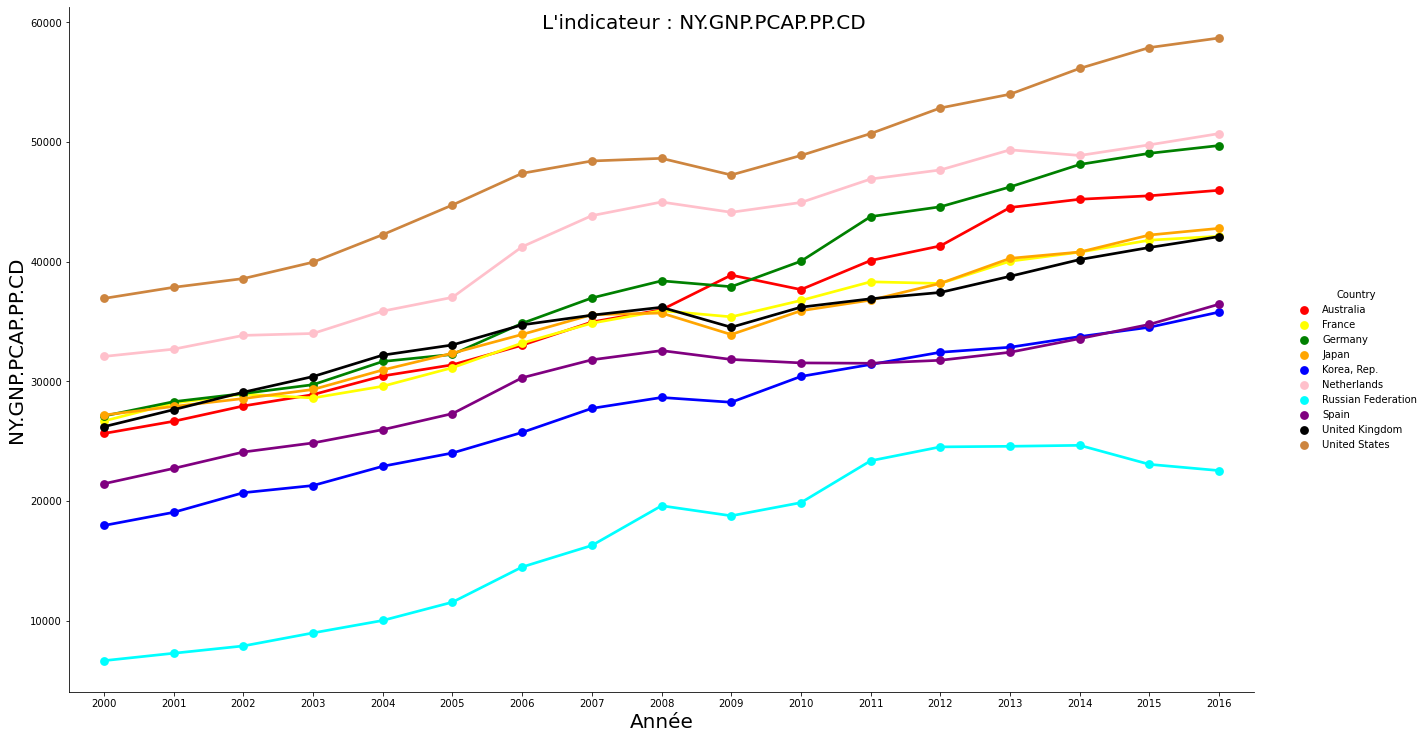

In [773]:
evolution_indic(df_evolution_Eco,'NY.GNP.PCAP.PP.CD')

- L'indicateur économique'NY.GNP.PCAP.PP.CD' présente une evolution croissante pour les tous les pays à l'exception de la Russie. Cette derniére montre une léger diminution à partir de l'année 2014 
- Les états Unis à une evolution importante par rapport au autre pays 

### Evolution de l'indicateur numérique

C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


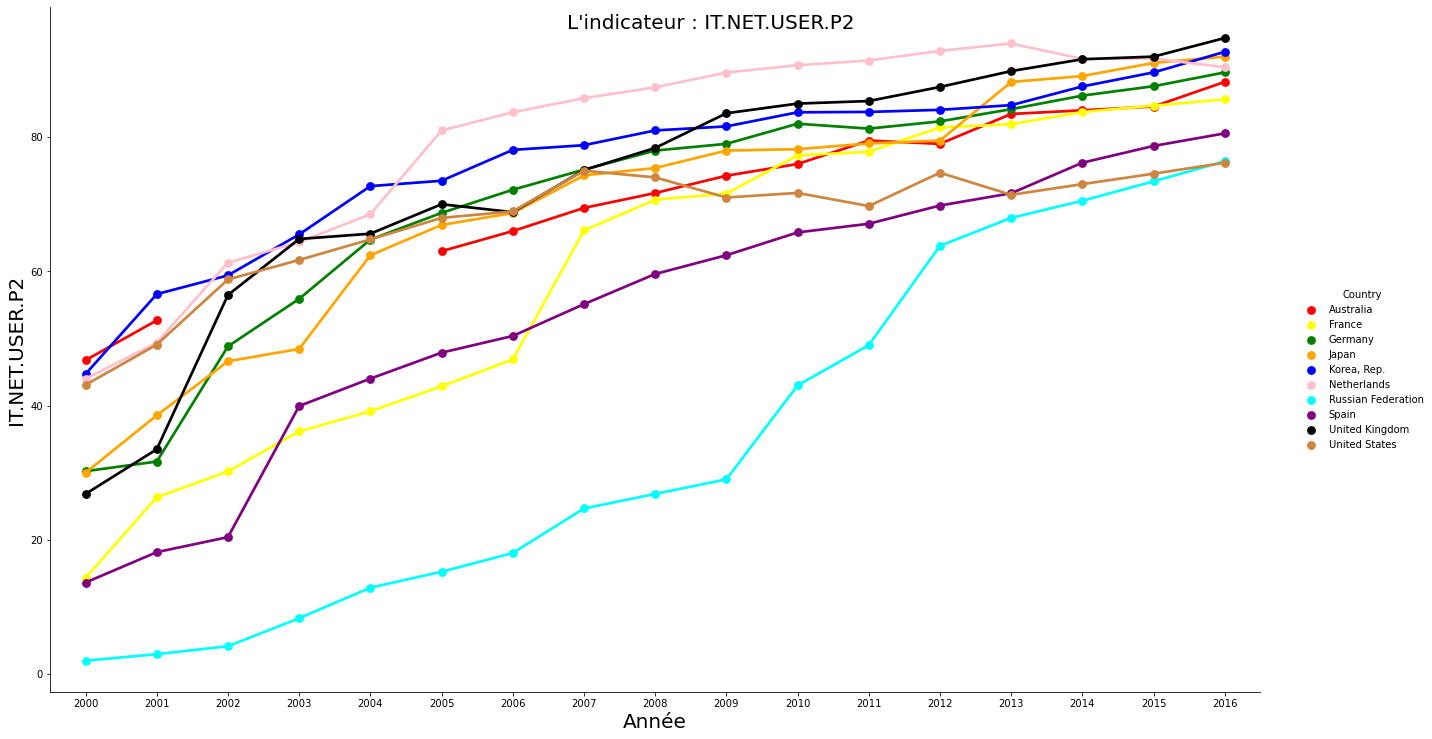

In [774]:
ind=['Internet users (per 100 people)']
df_evolution_Num= df_melt (df_evolution,ind)
evolution_indic(df_evolution_Num,'IT.NET.USER.P2')

- l'indicateur numérique 'IT.NET.USER.P2' presente une evolution croissante pour tous les pays , sauf pour le pays bas ou on remarque une diminution à partir de l'année 2013

### Evolution des 'indicateur démographique

C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


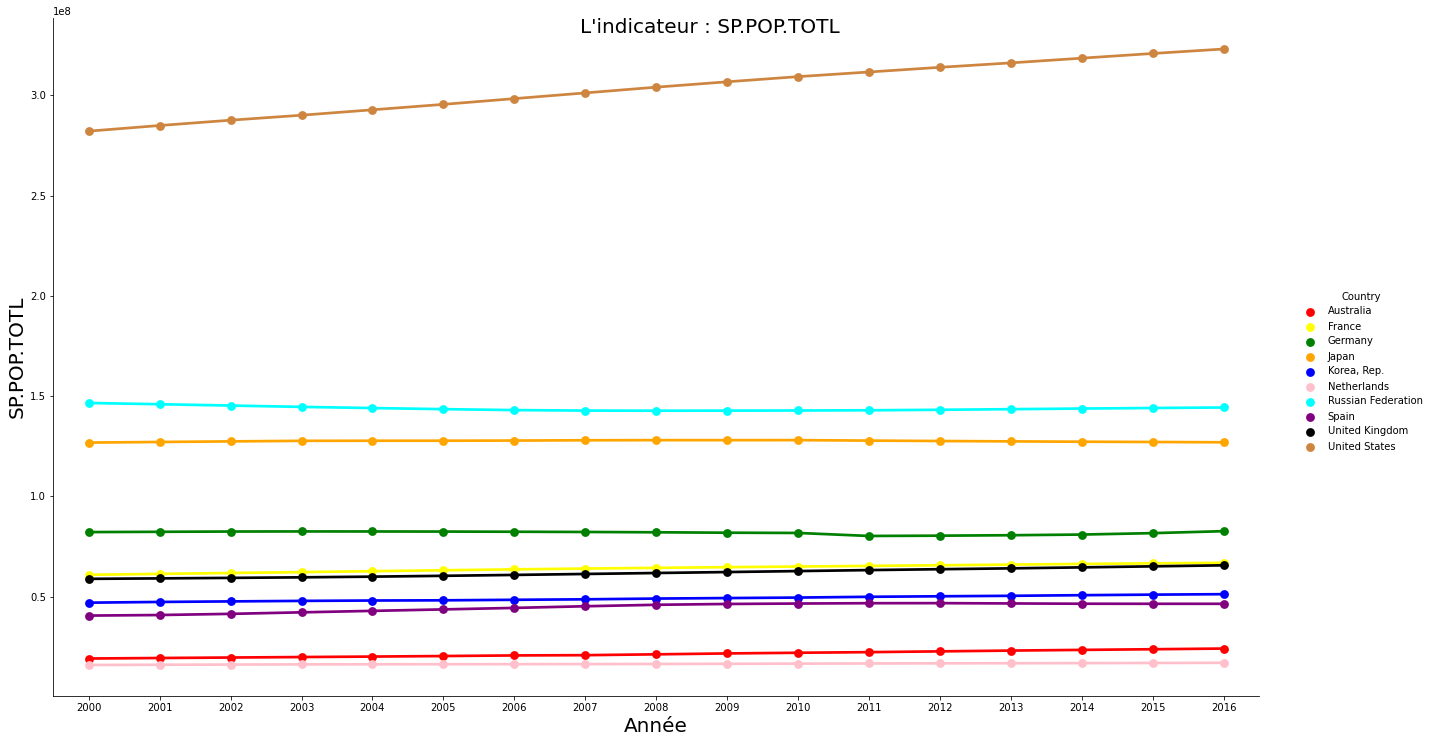

In [775]:
# Indicateur de population total

ind=['Population, total']
df_evolution_pop_tot= df_melt (df_evolution,ind)
evolution_indic(df_evolution_pop_tot,'SP.POP.TOTL')

- Tous les pays ont une évolution presque stable sauf pour les Etats Unis on remarque une augmentation chaque année  

C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


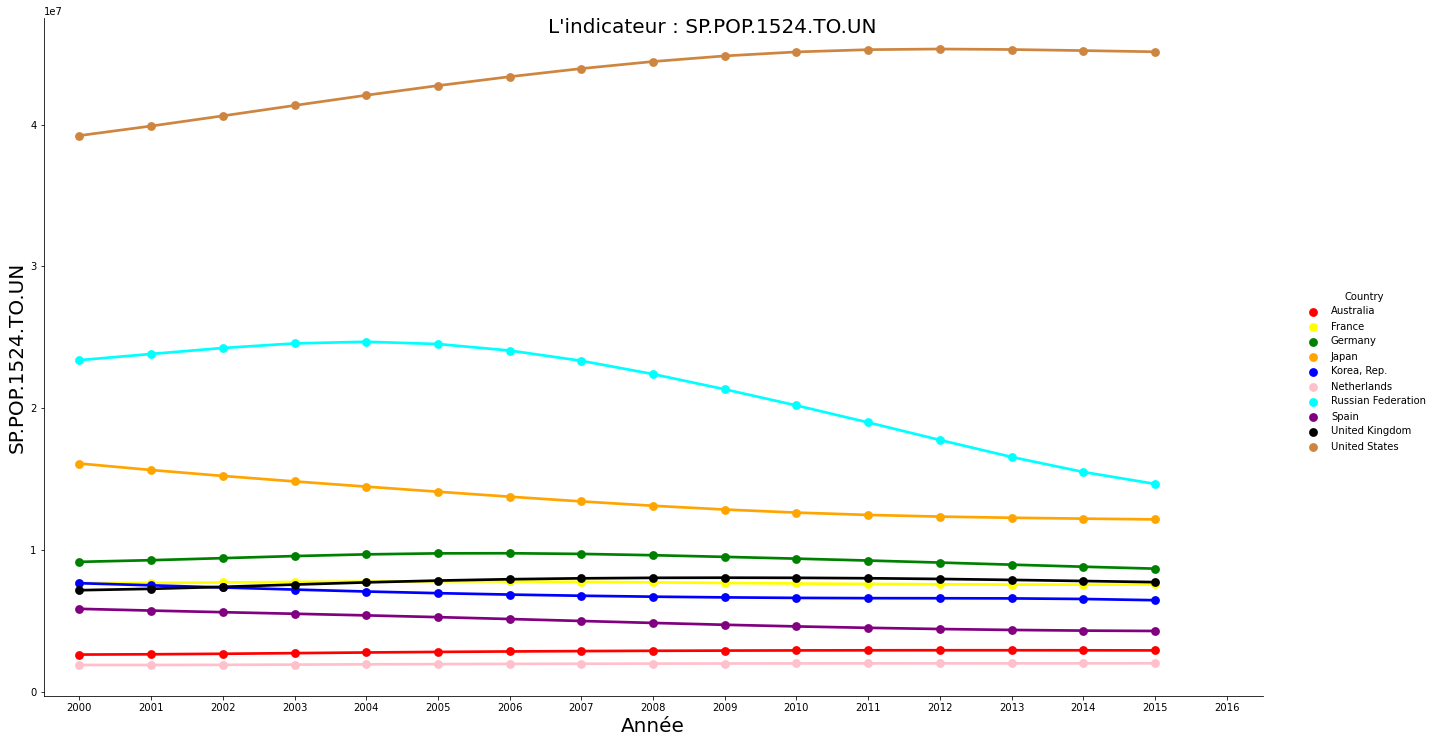

In [776]:
# Indicateur de population entre 15 et 24 ans 

ind=['Population, ages 15-24, total']
df_evolution_pop_1524= df_melt (df_evolution,ind)
evolution_indic(df_evolution_pop_1524,'SP.POP.1524.TO.UN')

- on remarque que :
- Une evolution presque stable pour la majorité des pays  
- Les états Unis à une evolution importante par rapport au autre pays
- Une evolution décroissante pour la Russie à partir de l'année 2005

### Evolution des indicateurs éducation

C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


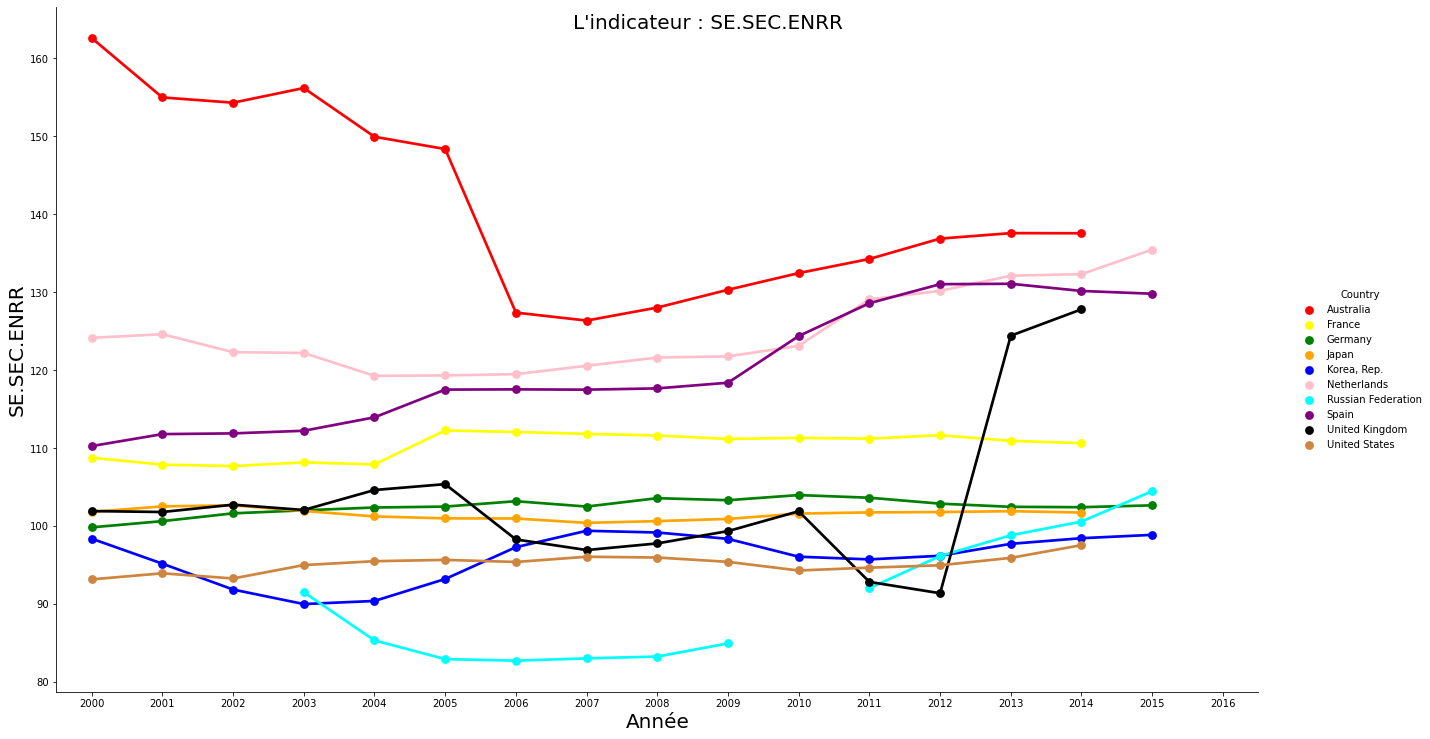

In [777]:
ind=['Gross enrolment ratio, secondary, both sexes (%)']
df_evolution_sec= df_melt (df_evolution,ind)
evolution_indic(df_evolution_sec,'SE.SEC.ENRR')

- On remarque :
- une evolution croissante et faible pour la Russie ,Royaume-Uni , les Pays-Bas et Les états Unis 
- une léger diminution à partir de l'année 2013 pour l'Espagne , France et Allemagne

C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


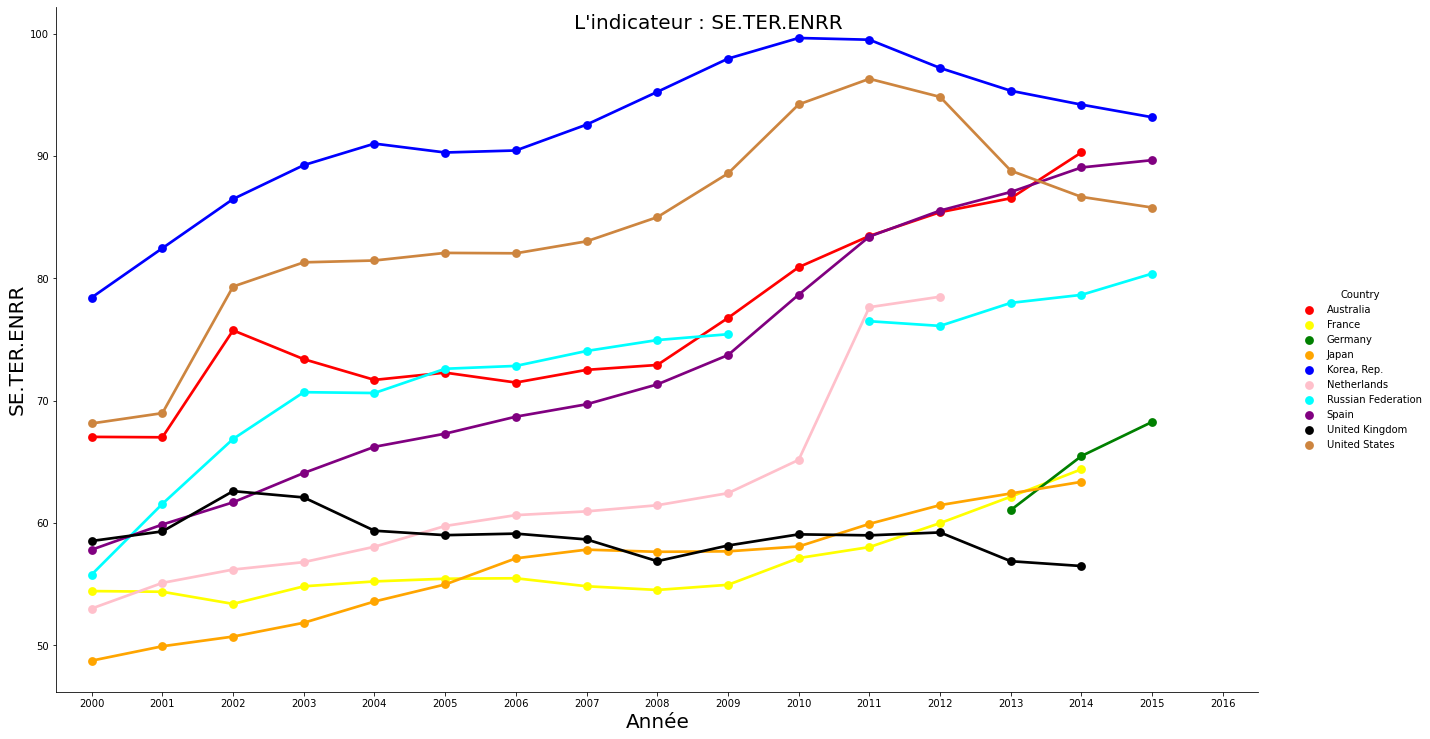

In [778]:
ind=['Gross enrolment ratio, tertiary, both sexes (%)']
df_evolution_ter= df_melt (df_evolution,ind)
evolution_indic(df_evolution_ter,'SE.TER.ENRR')

- On remarque :
- une evolution croissante et faible pour l'Espagne , France ,Australie 
- une diminution à partir de l'année 2011 pour la Corée  ,Royaume-Uni et Les états Unis 
- l'evolution des Pays-Bas l'évolution s'arrête en 2012 



C:\Users\karim\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


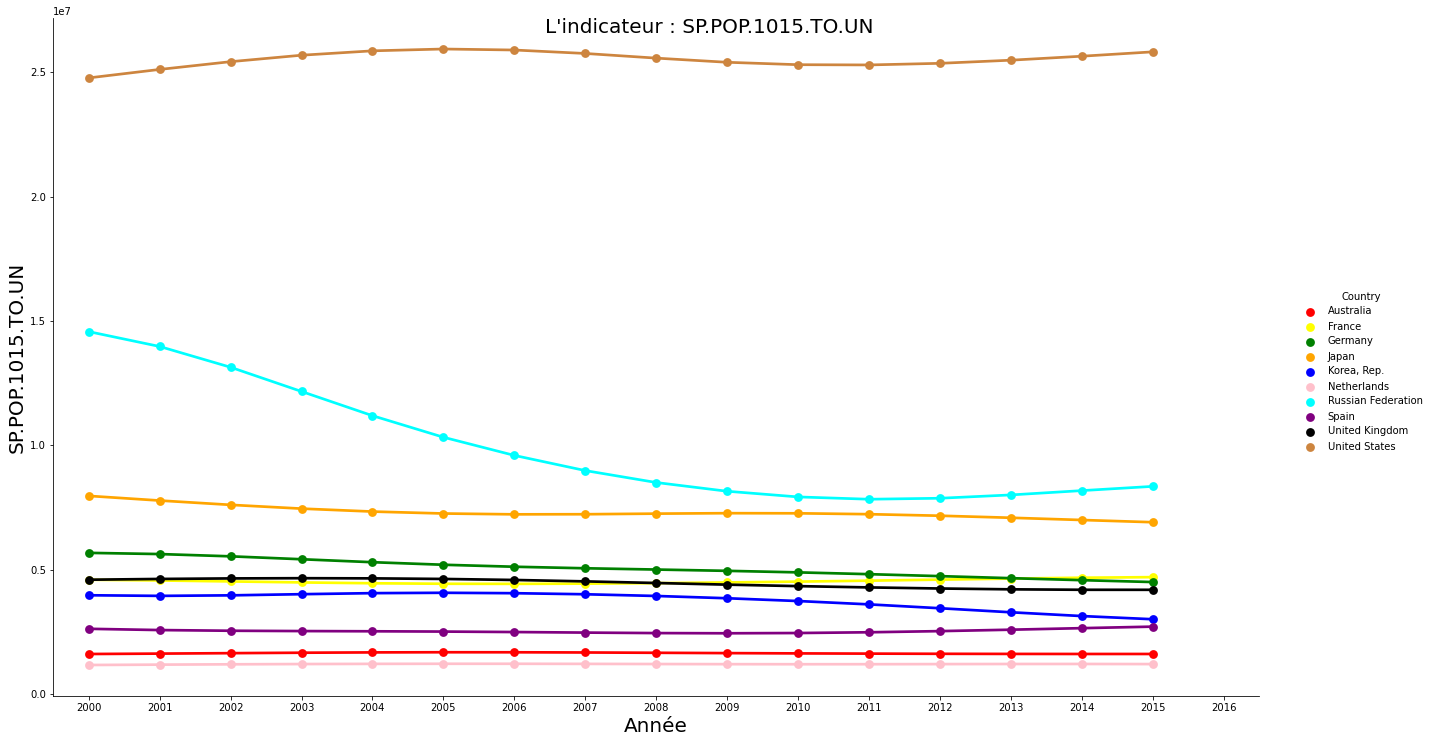

In [779]:
# Les futur clients : la population entre 10 et 15 ans 

ind=['Population, ages 10-15, total']
df_evolution_pop_1015= df_melt (df_evolution,ind)
evolution_indic(df_evolution_pop_1015,'SP.POP.1015.TO.UN')

- Une grande évolution pour les Etas Unis par raport au autre pays 
- Une évolution décroissante pour la Russie 
- Le rest des pays ont une évolution presque stable 